In [2]:
import os
from datetime import date
from lrp_update import query_openet

In [5]:
# Create an Openet object with a path to the database and the api key
path_to_folder_with_data = r'Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Enforcement Documentation\OpenET\consolidated_openet_datasets'

open_et_obj = query_openet.OpenetApi.from_file(path_dataset=path_to_folder_with_data,
                                     fn_key='data/CH_OpenET_APIkey.txt')



In [14]:
# Query the database and if necessary update the local dataset 
today = date.today().strftime('%Y-%m-%d')

for year in ["Year1", "Year2"]:
    
    for repurposed in ["repurposed", "nonrepurposed"]:

        # UPDATE ET
        query_et = {
        "variable": "ET",
        "start_date": "2018-01-01",
        "end_date": today,
        "interval": "monthly",
        "model": "ensemble",
        "reducer": "mean",
        "reference_et": "cimis",
        "units": "in",
        "attributes": "EKIfld",
        "asset_id": f"projects/ee-csheppner/assets/{year}_enrolled_{repurposed}",                
        }
    
        open_et_obj.update_local_dataset(**query_et)
    
        # UPDATE ET
        query_pp = {
        "variable": "pr",
        "start_date": "2018-01-01",
        "end_date": today,
        "interval": "monthly",
        "model": "ensemble",
        "reducer": "mean",
        "reference_et": "cimis",
        "units": "in",
        "attributes": "EKIfld",
        "asset_id": f"projects/ee-csheppner/assets/{year}_enrolled_{repurposed}",                
        }
    
        open_et_obj.update_local_dataset(**query_pp)

Requested data for period 2018-01-01:2024-08-05 extends beyond data available locally for variable ET
Requesting new available data for ET...
Request Successful. Retrieving data
Requested data for period 2018-01-01:2024-08-05 extends beyond data available locally for variable pr
Requesting new available data for pr...
Request Successful. Retrieving data
Requested data for period 2018-01-01:2024-08-05 extends beyond data available locally for variable ET
Requesting new available data for ET...
Request Successful. Retrieving data
Requested data for period 2018-01-01:2024-08-05 extends beyond data available locally for variable pr
Requesting new available data for pr...
Request Successful. Retrieving data
Requested data for period 2018-01-01:2024-08-05 extends beyond data available locally for variable ET
Requesting new available data for ET...
Request Successful. Retrieving data
Requested data for period 2018-01-01:2024-08-05 extends beyond data available locally for variable pr
Requesti

In [6]:
path_ekifld = "Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Enforcement Documentation\OpenET\consolidated_openet_datasets\EKIfld_IDs_key.csv"
path_to_pdf_templates = r"Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Enforcement Documentation\report_templates"

Creating report with the following information
LRPAgreementNumber  00001
LRPParticipantName  Maradani
AreaofLandRepurposed  73.50 acres
MinimumWaterUseReduction  77.12 AFY
BaselineWaterUse  118.96 AFY
MaximumConsumptiveUse  41.83 AFY
Processing report for  Maradani,  00001
calculating consumptive use for 0    4
1    9
Name: EKIfld, dtype: int64
Creating report with the following information
LRPAgreementNumber  00005
LRPParticipantName  Nyman
AreaofLandRepurposed  479.70 acres
MinimumWaterUseReduction  875.57 AFY
BaselineWaterUse  1201.92 AFY
MaximumConsumptiveUse  326.35 AFY
Processing report for  Nyman,  00005
calculating consumptive use for 31    16
32    22
33    25
34    37
Name: EKIfld, dtype: int64
Creating report with the following information
LRPAgreementNumber  00007
LRPParticipantName  Robson
AreaofLandRepurposed  101.33 acres
MinimumWaterUseReduction  233.73 AFY
BaselineWaterUse  309.57 AFY
MaximumConsumptiveUse  75.84 AFY
Processing report for  Robson,  00007
calculating co

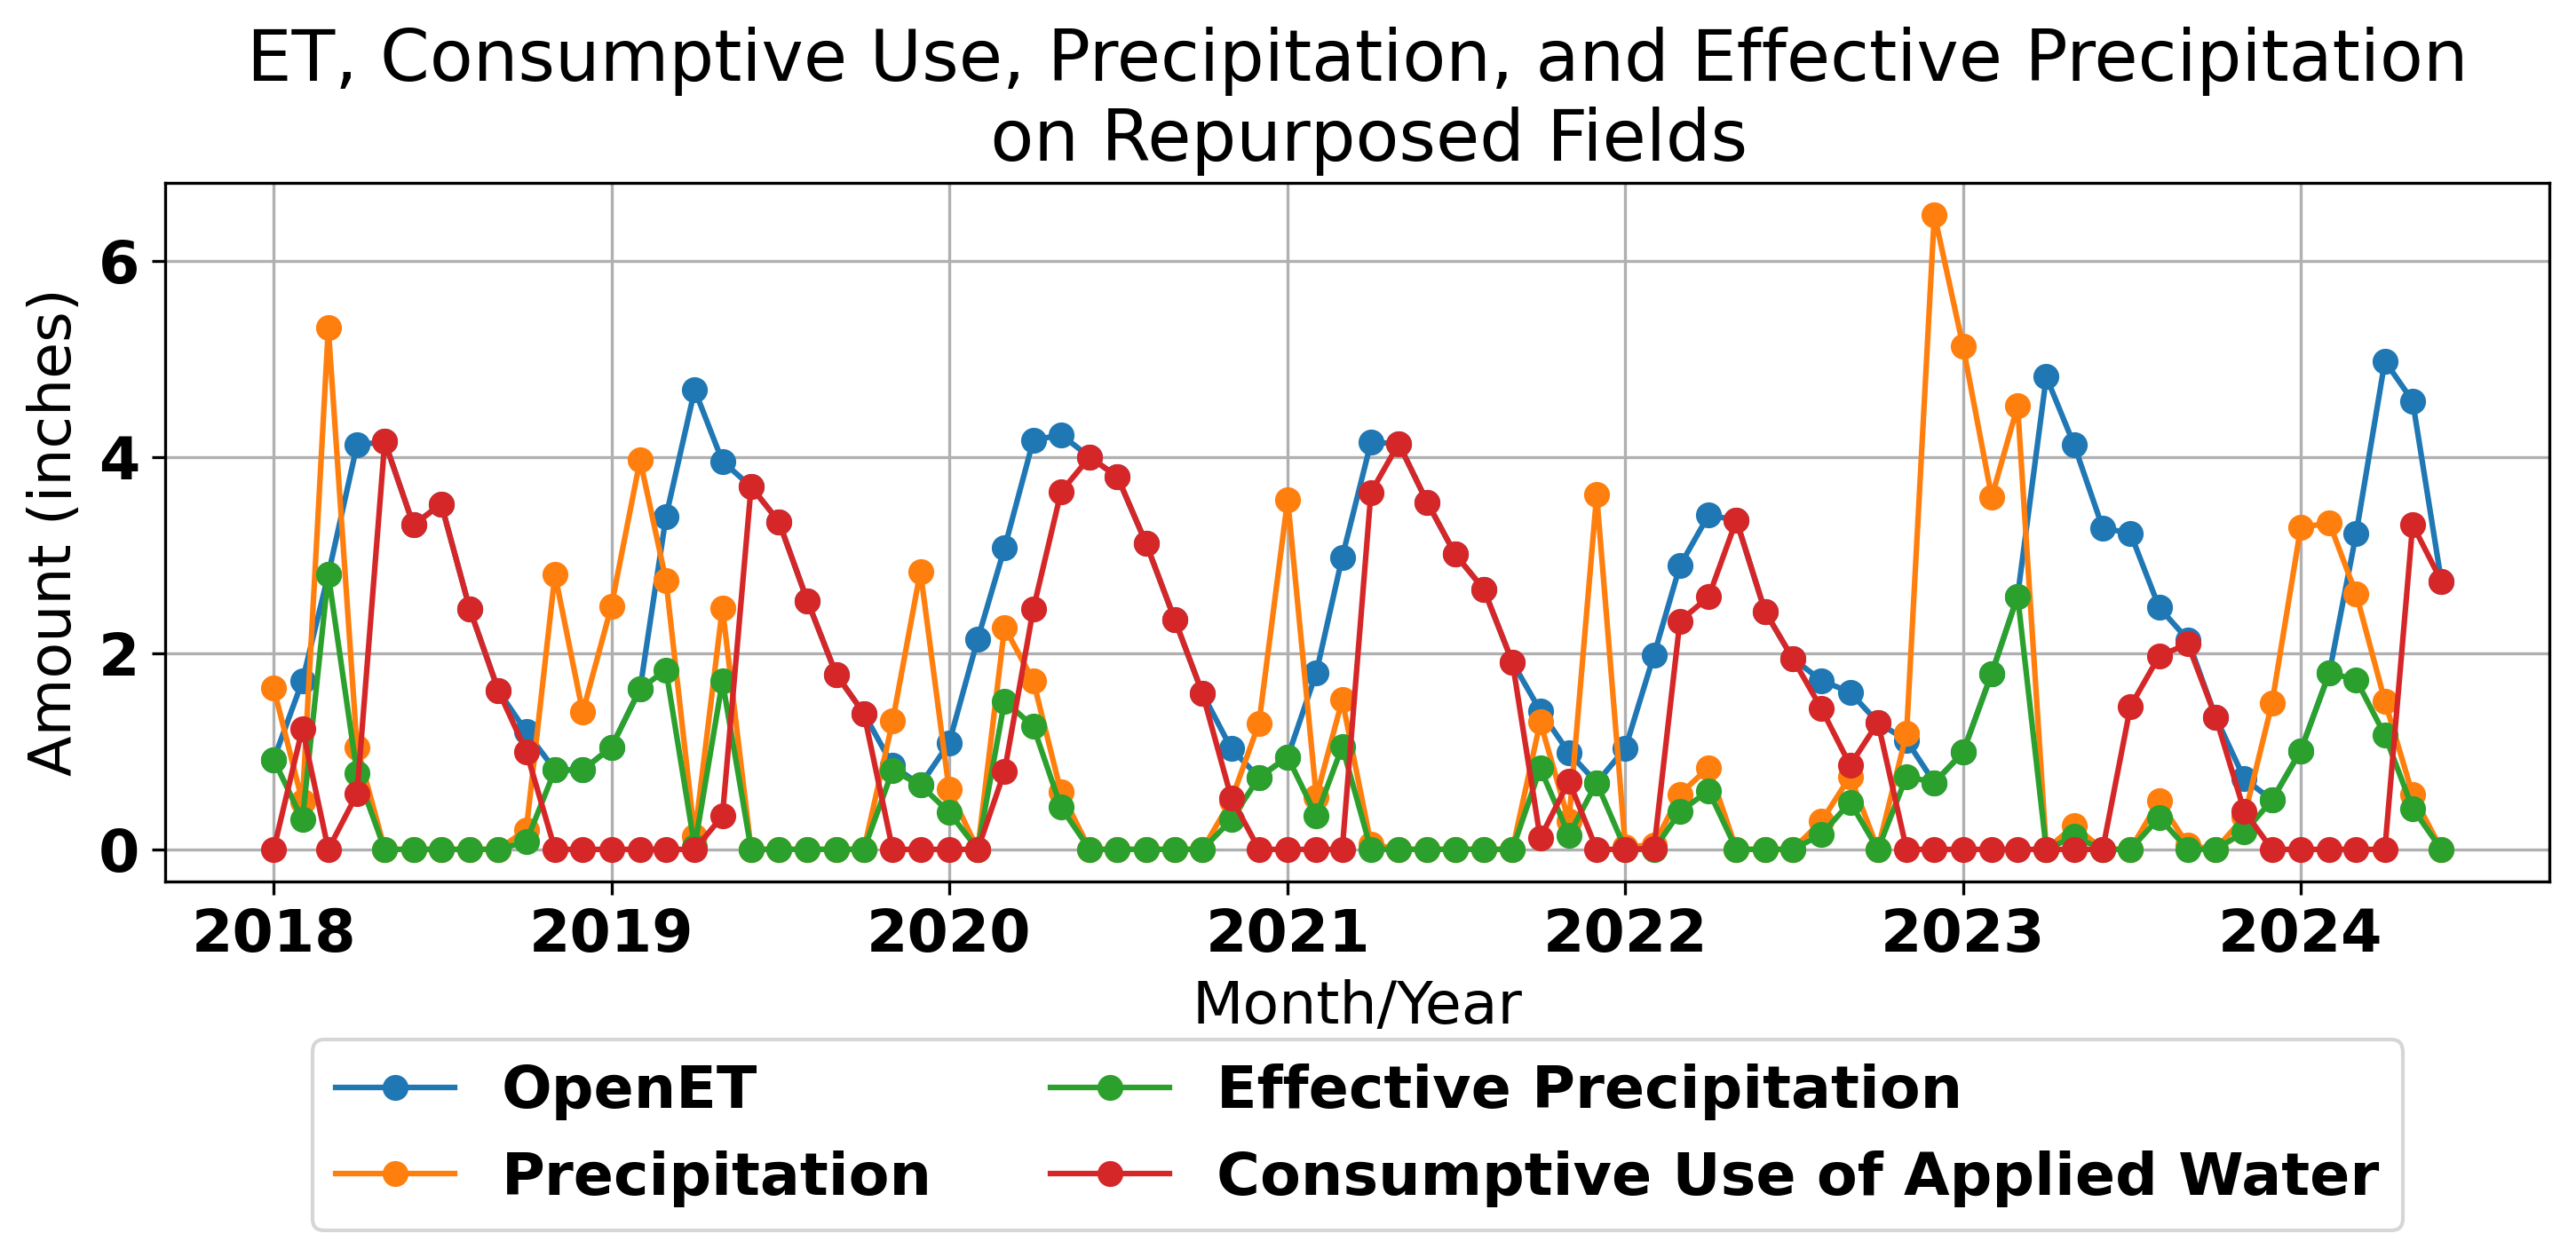

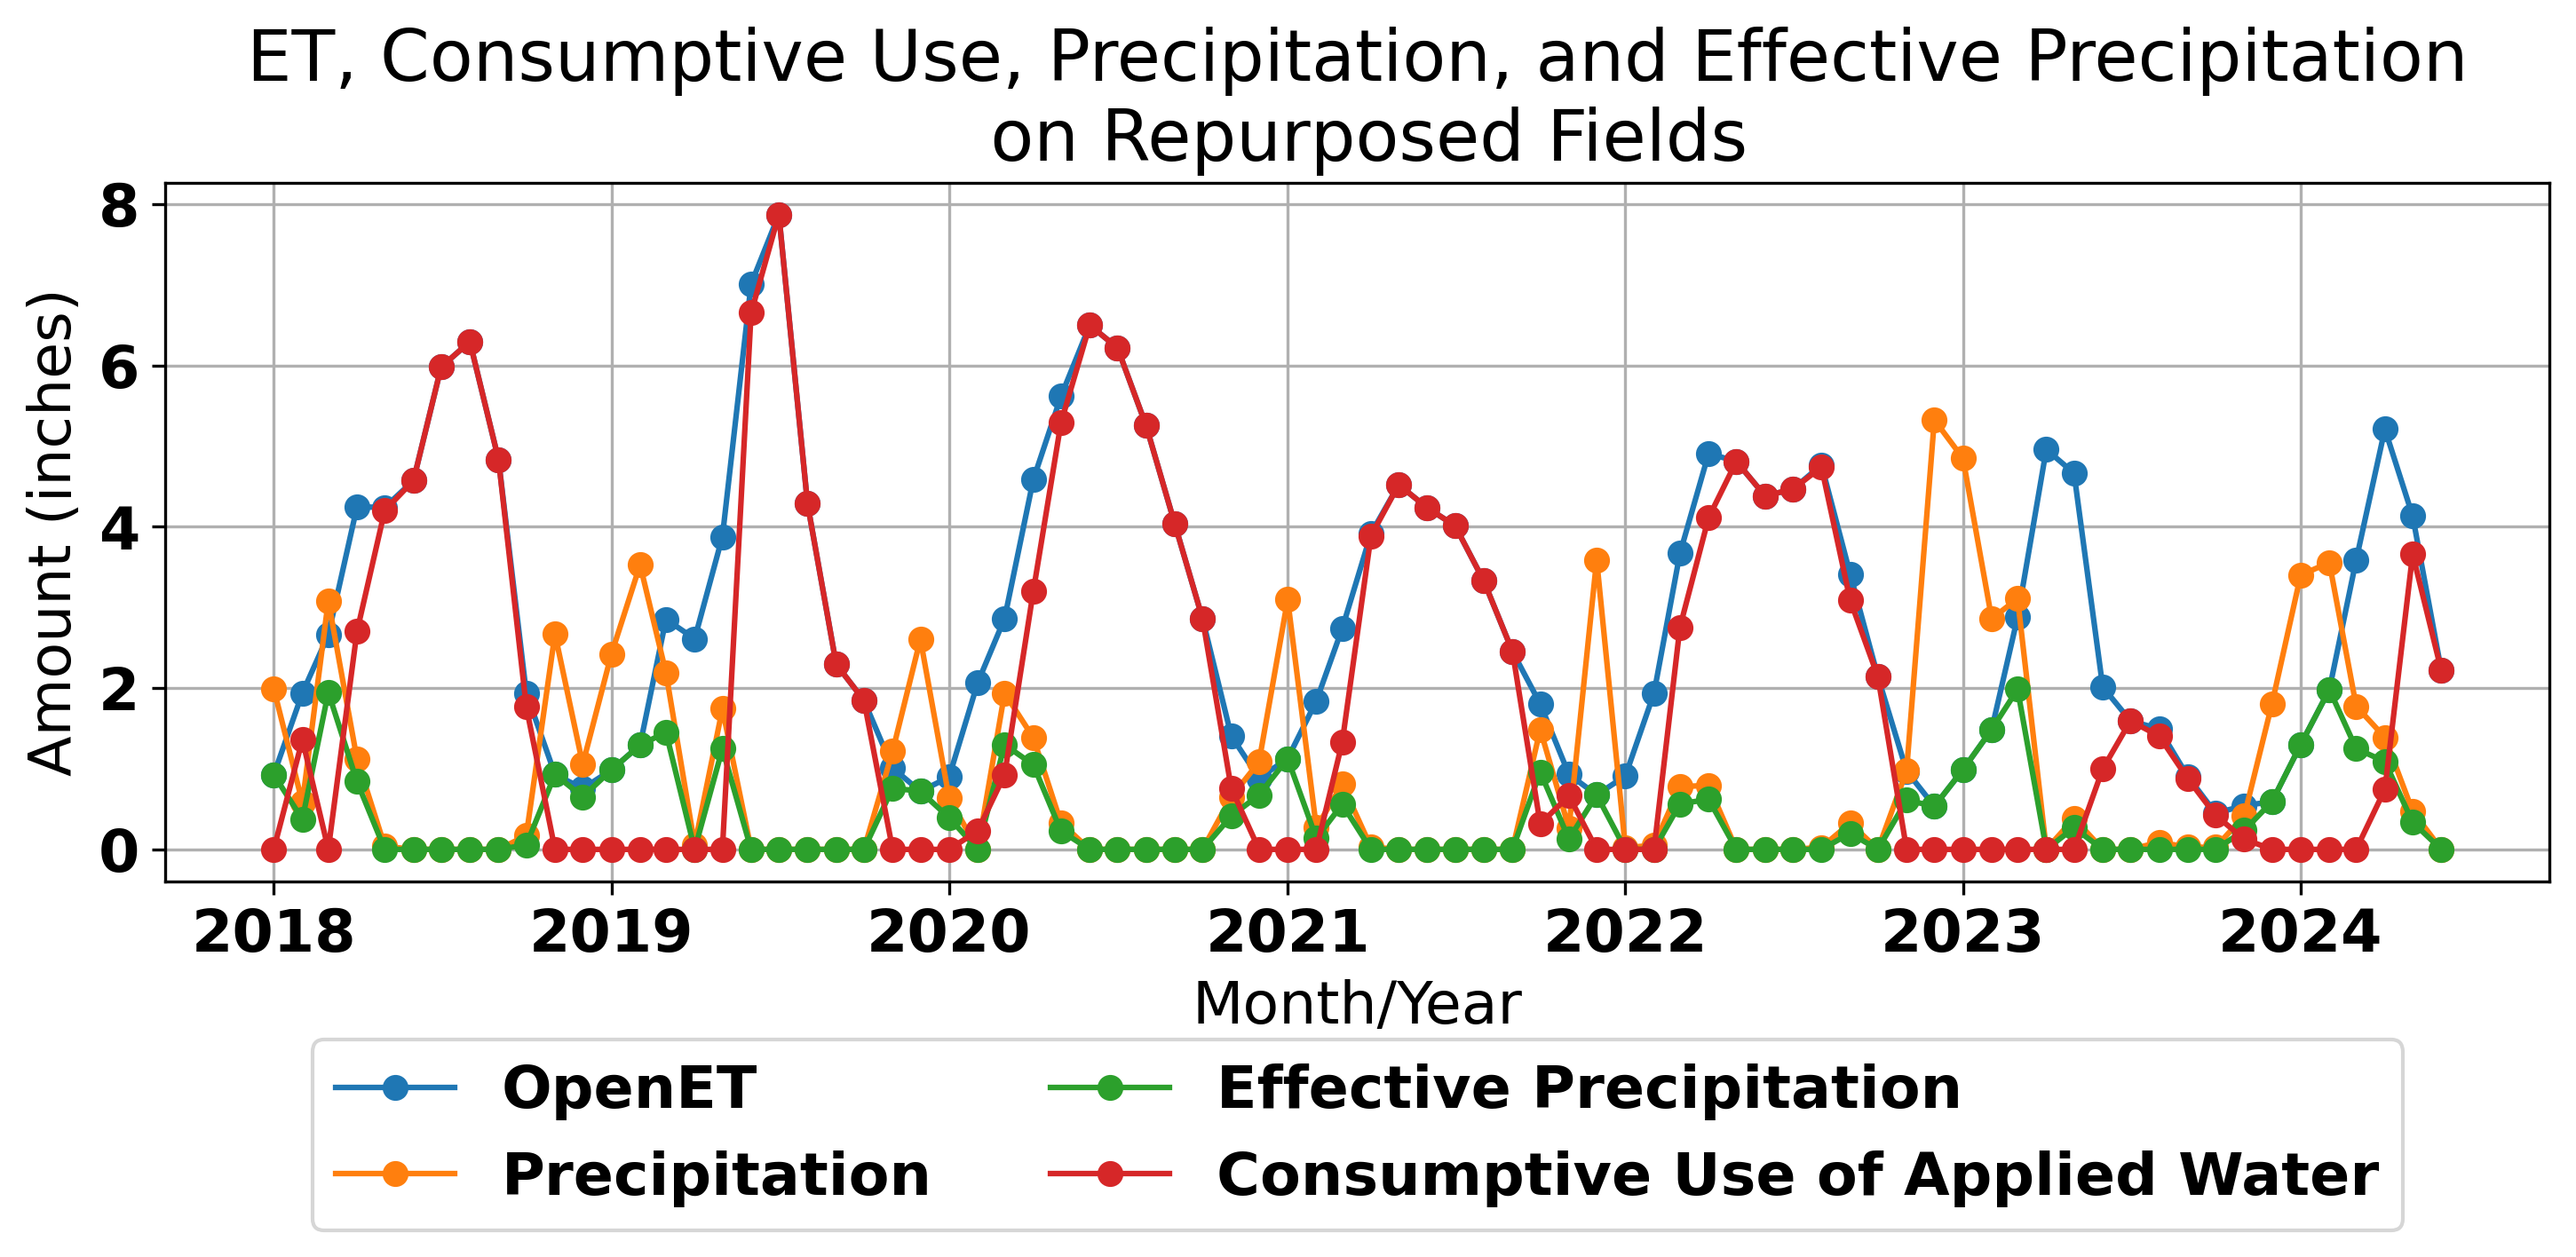

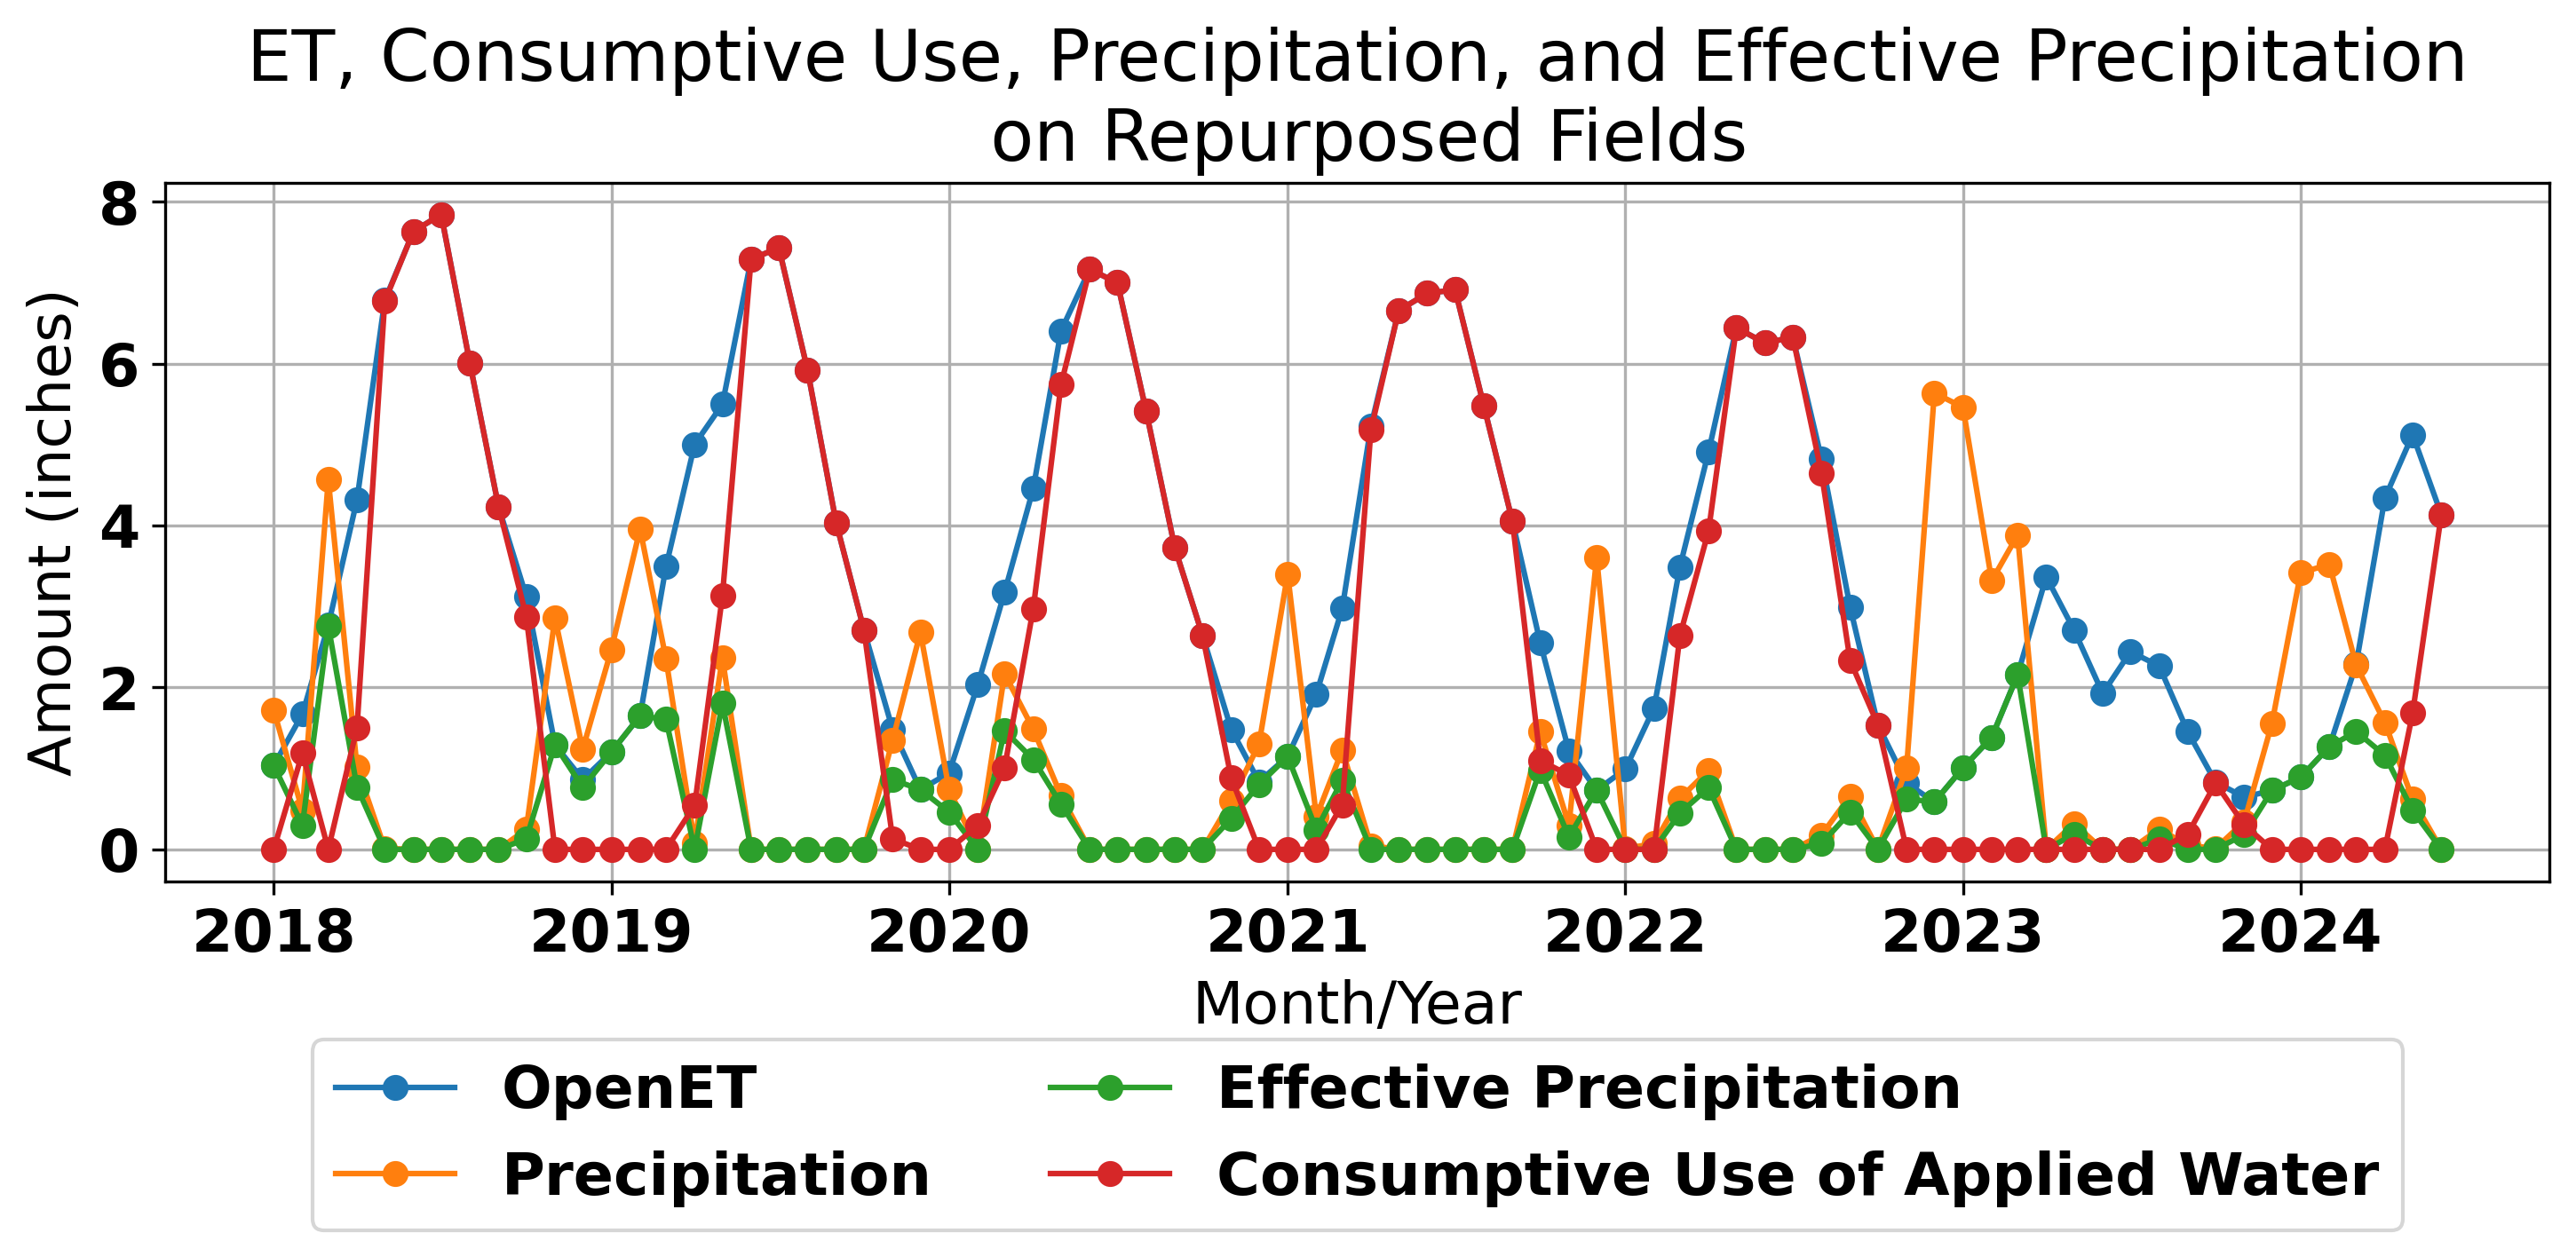

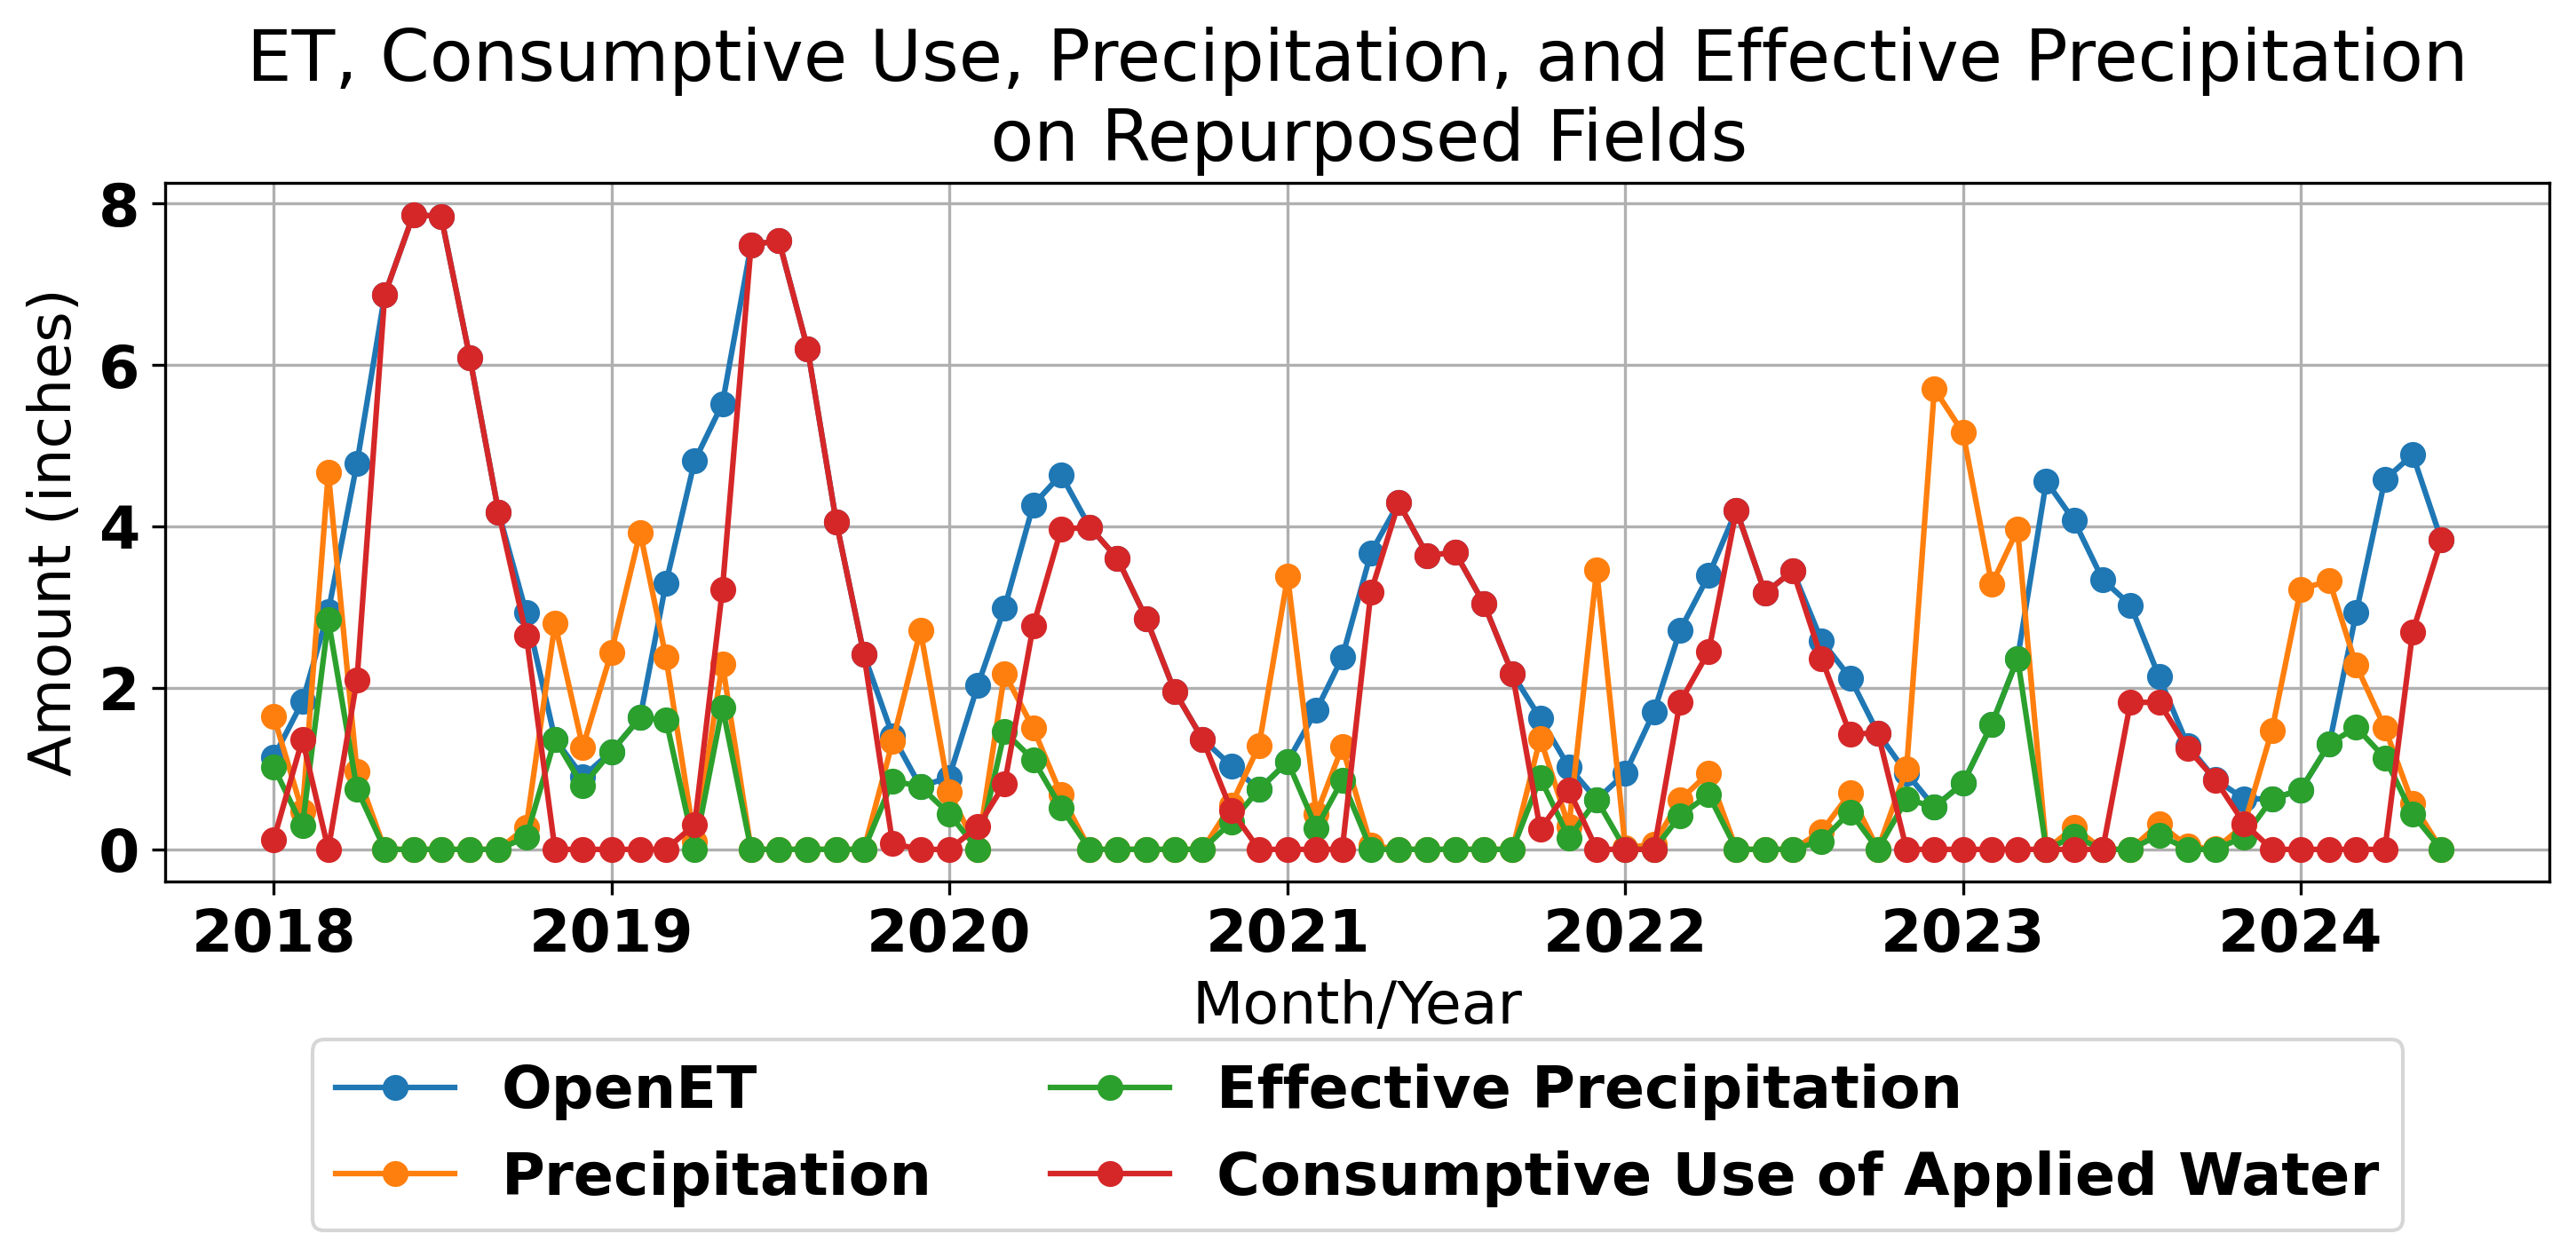

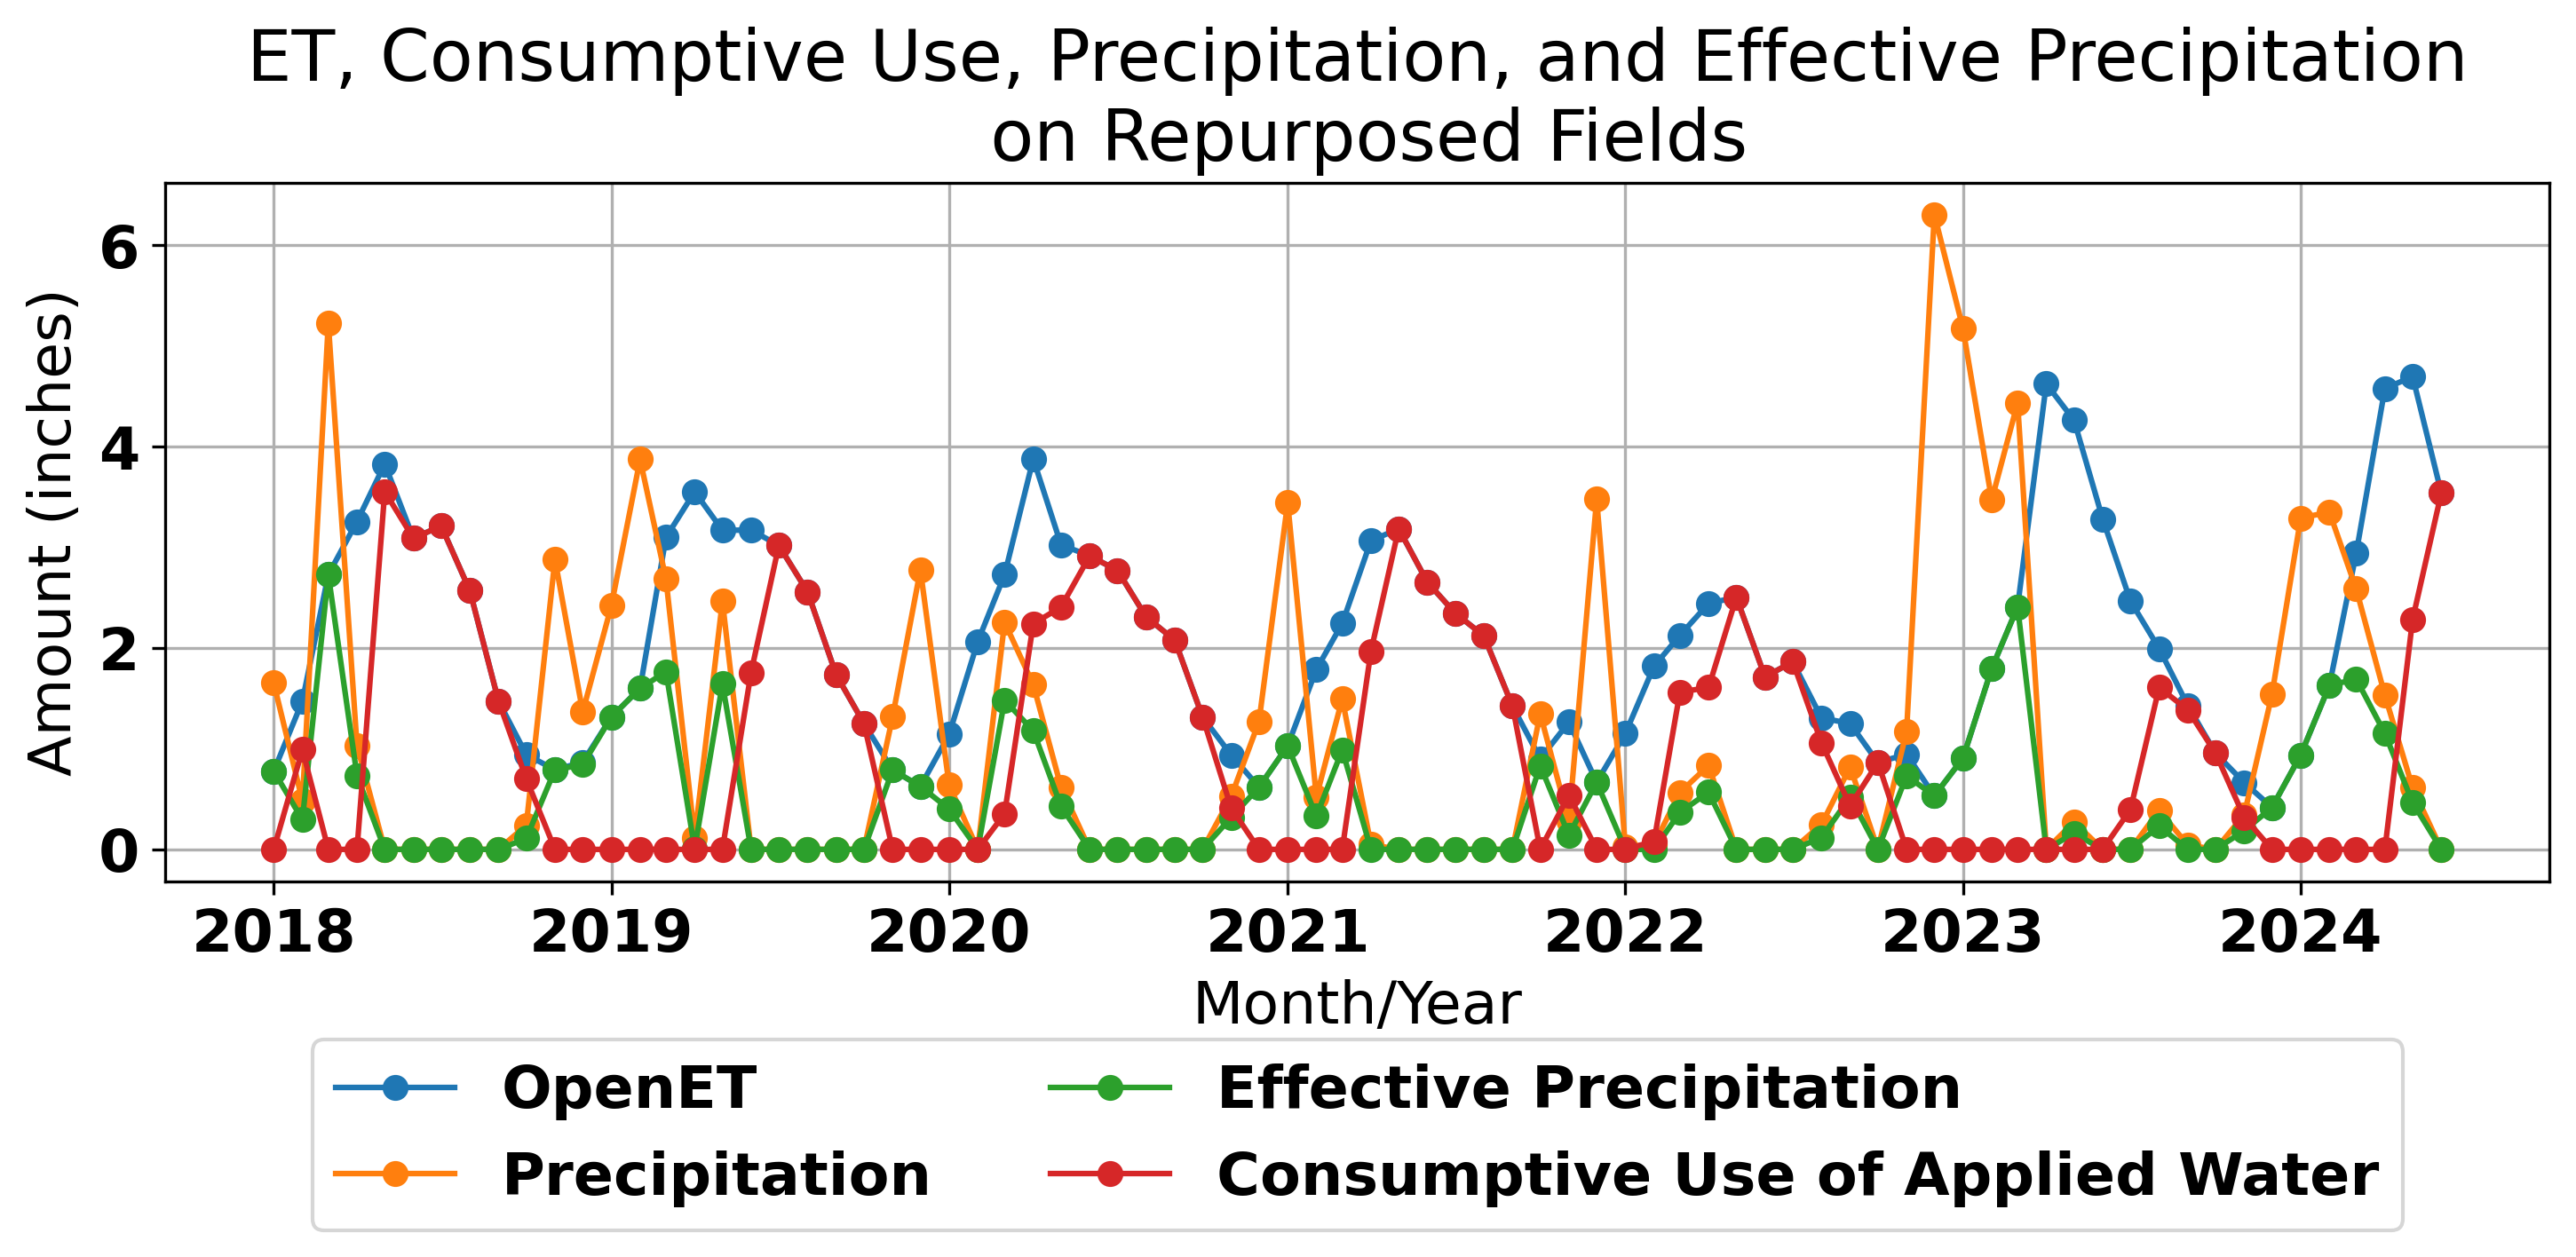

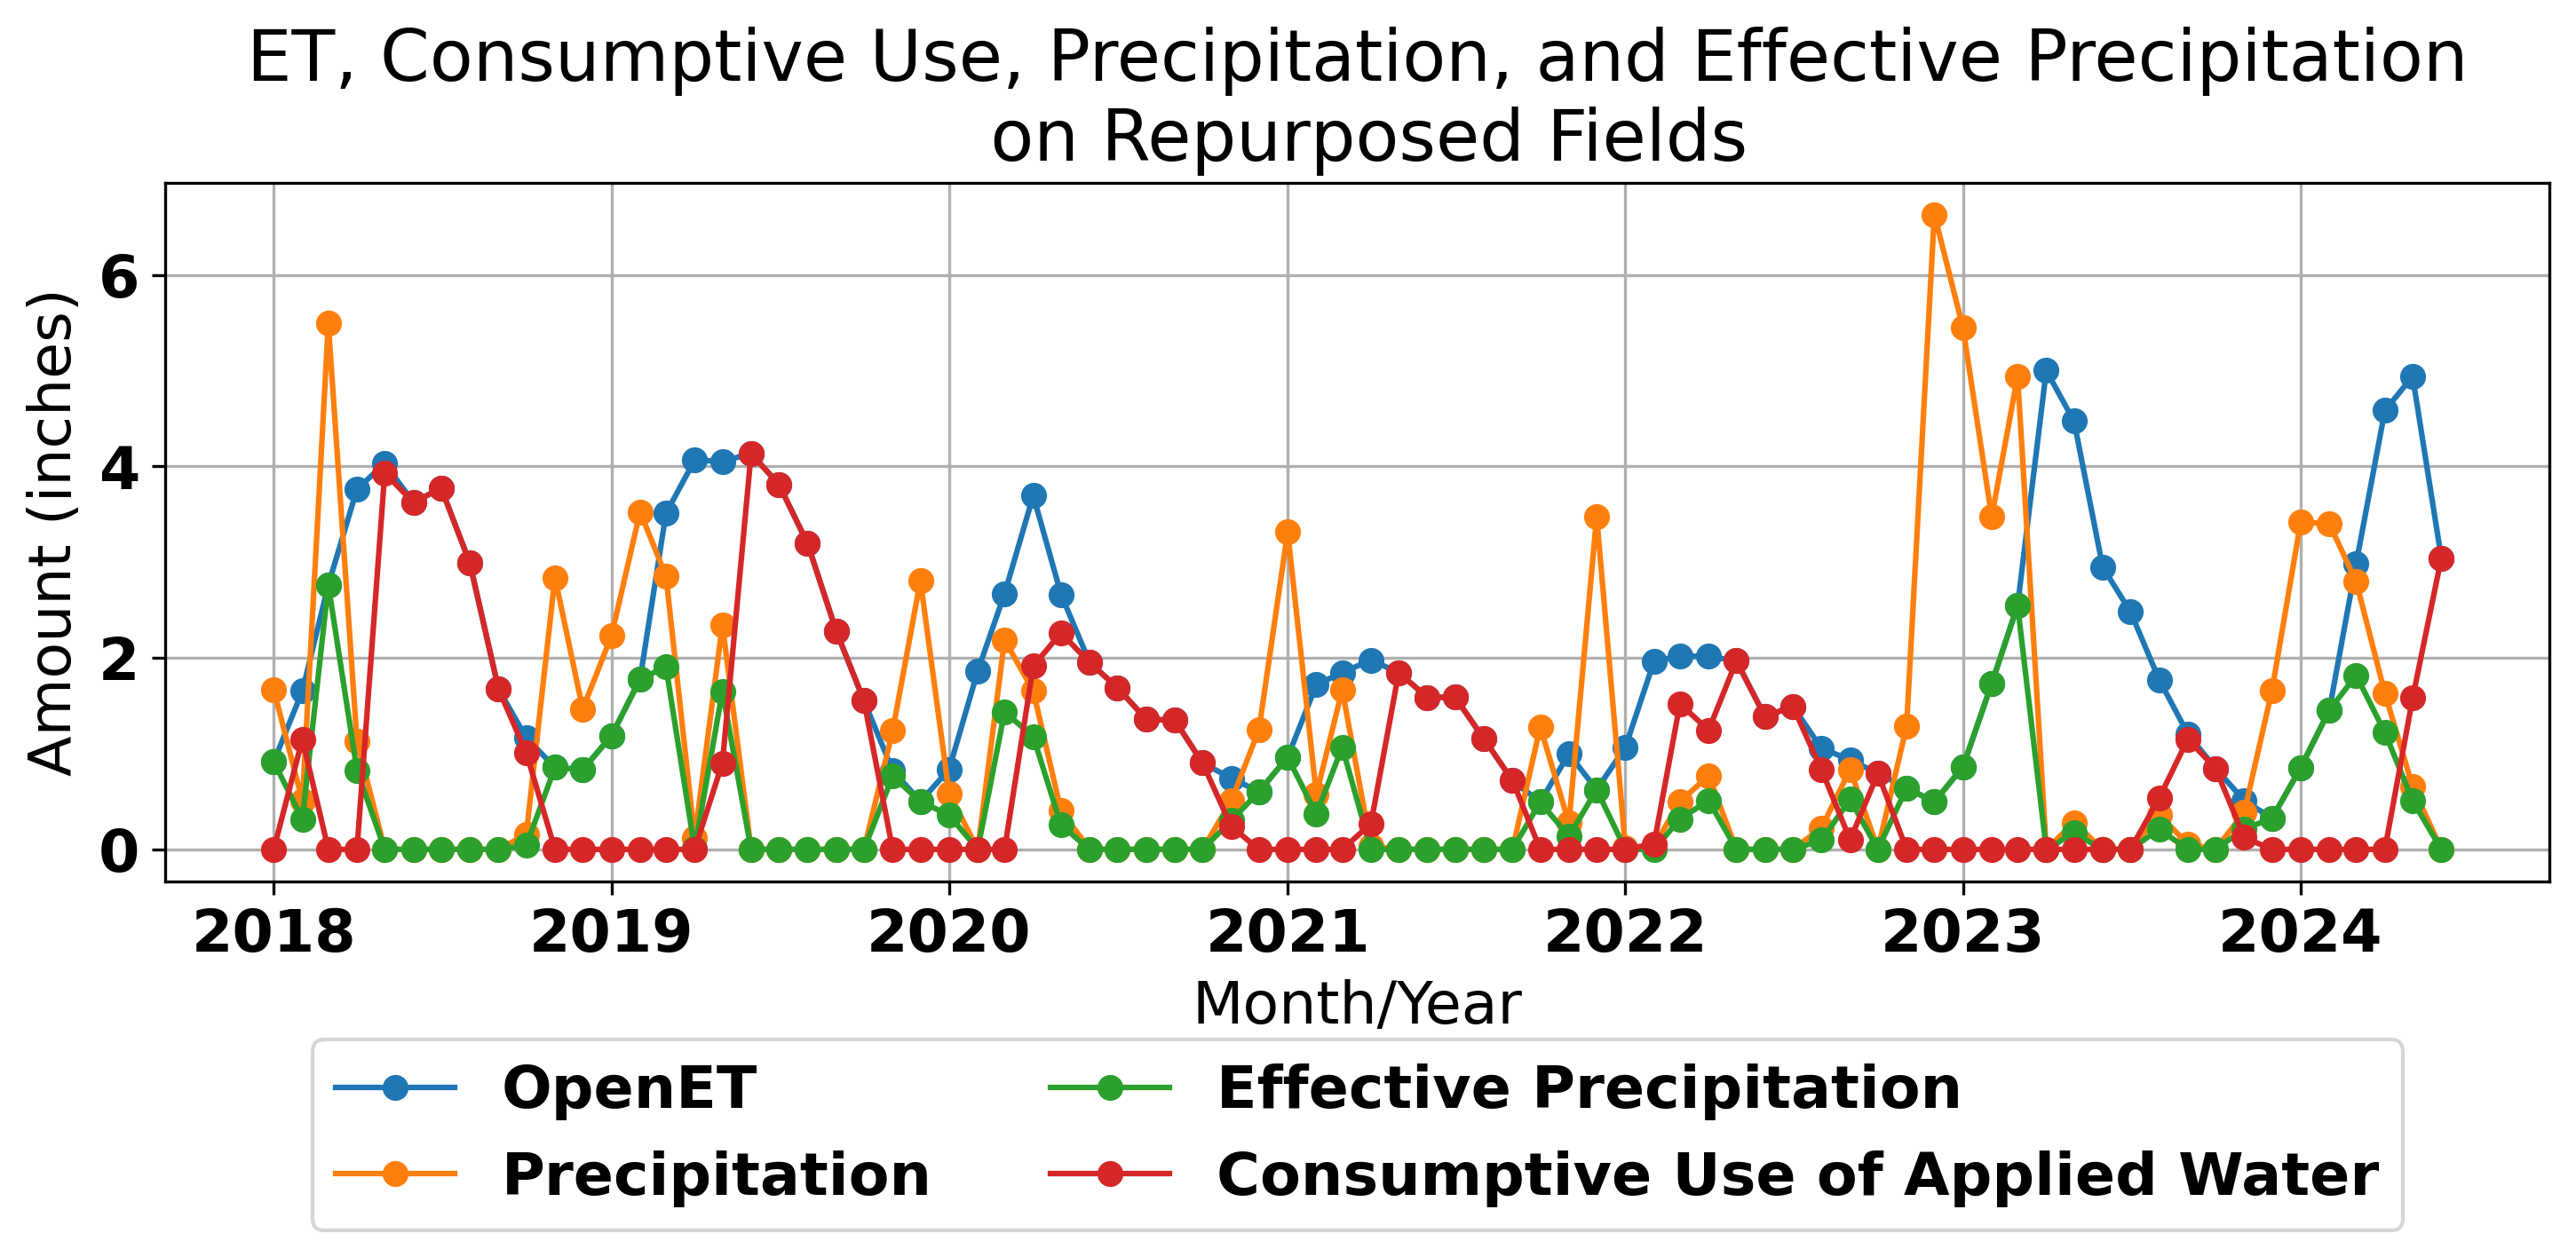

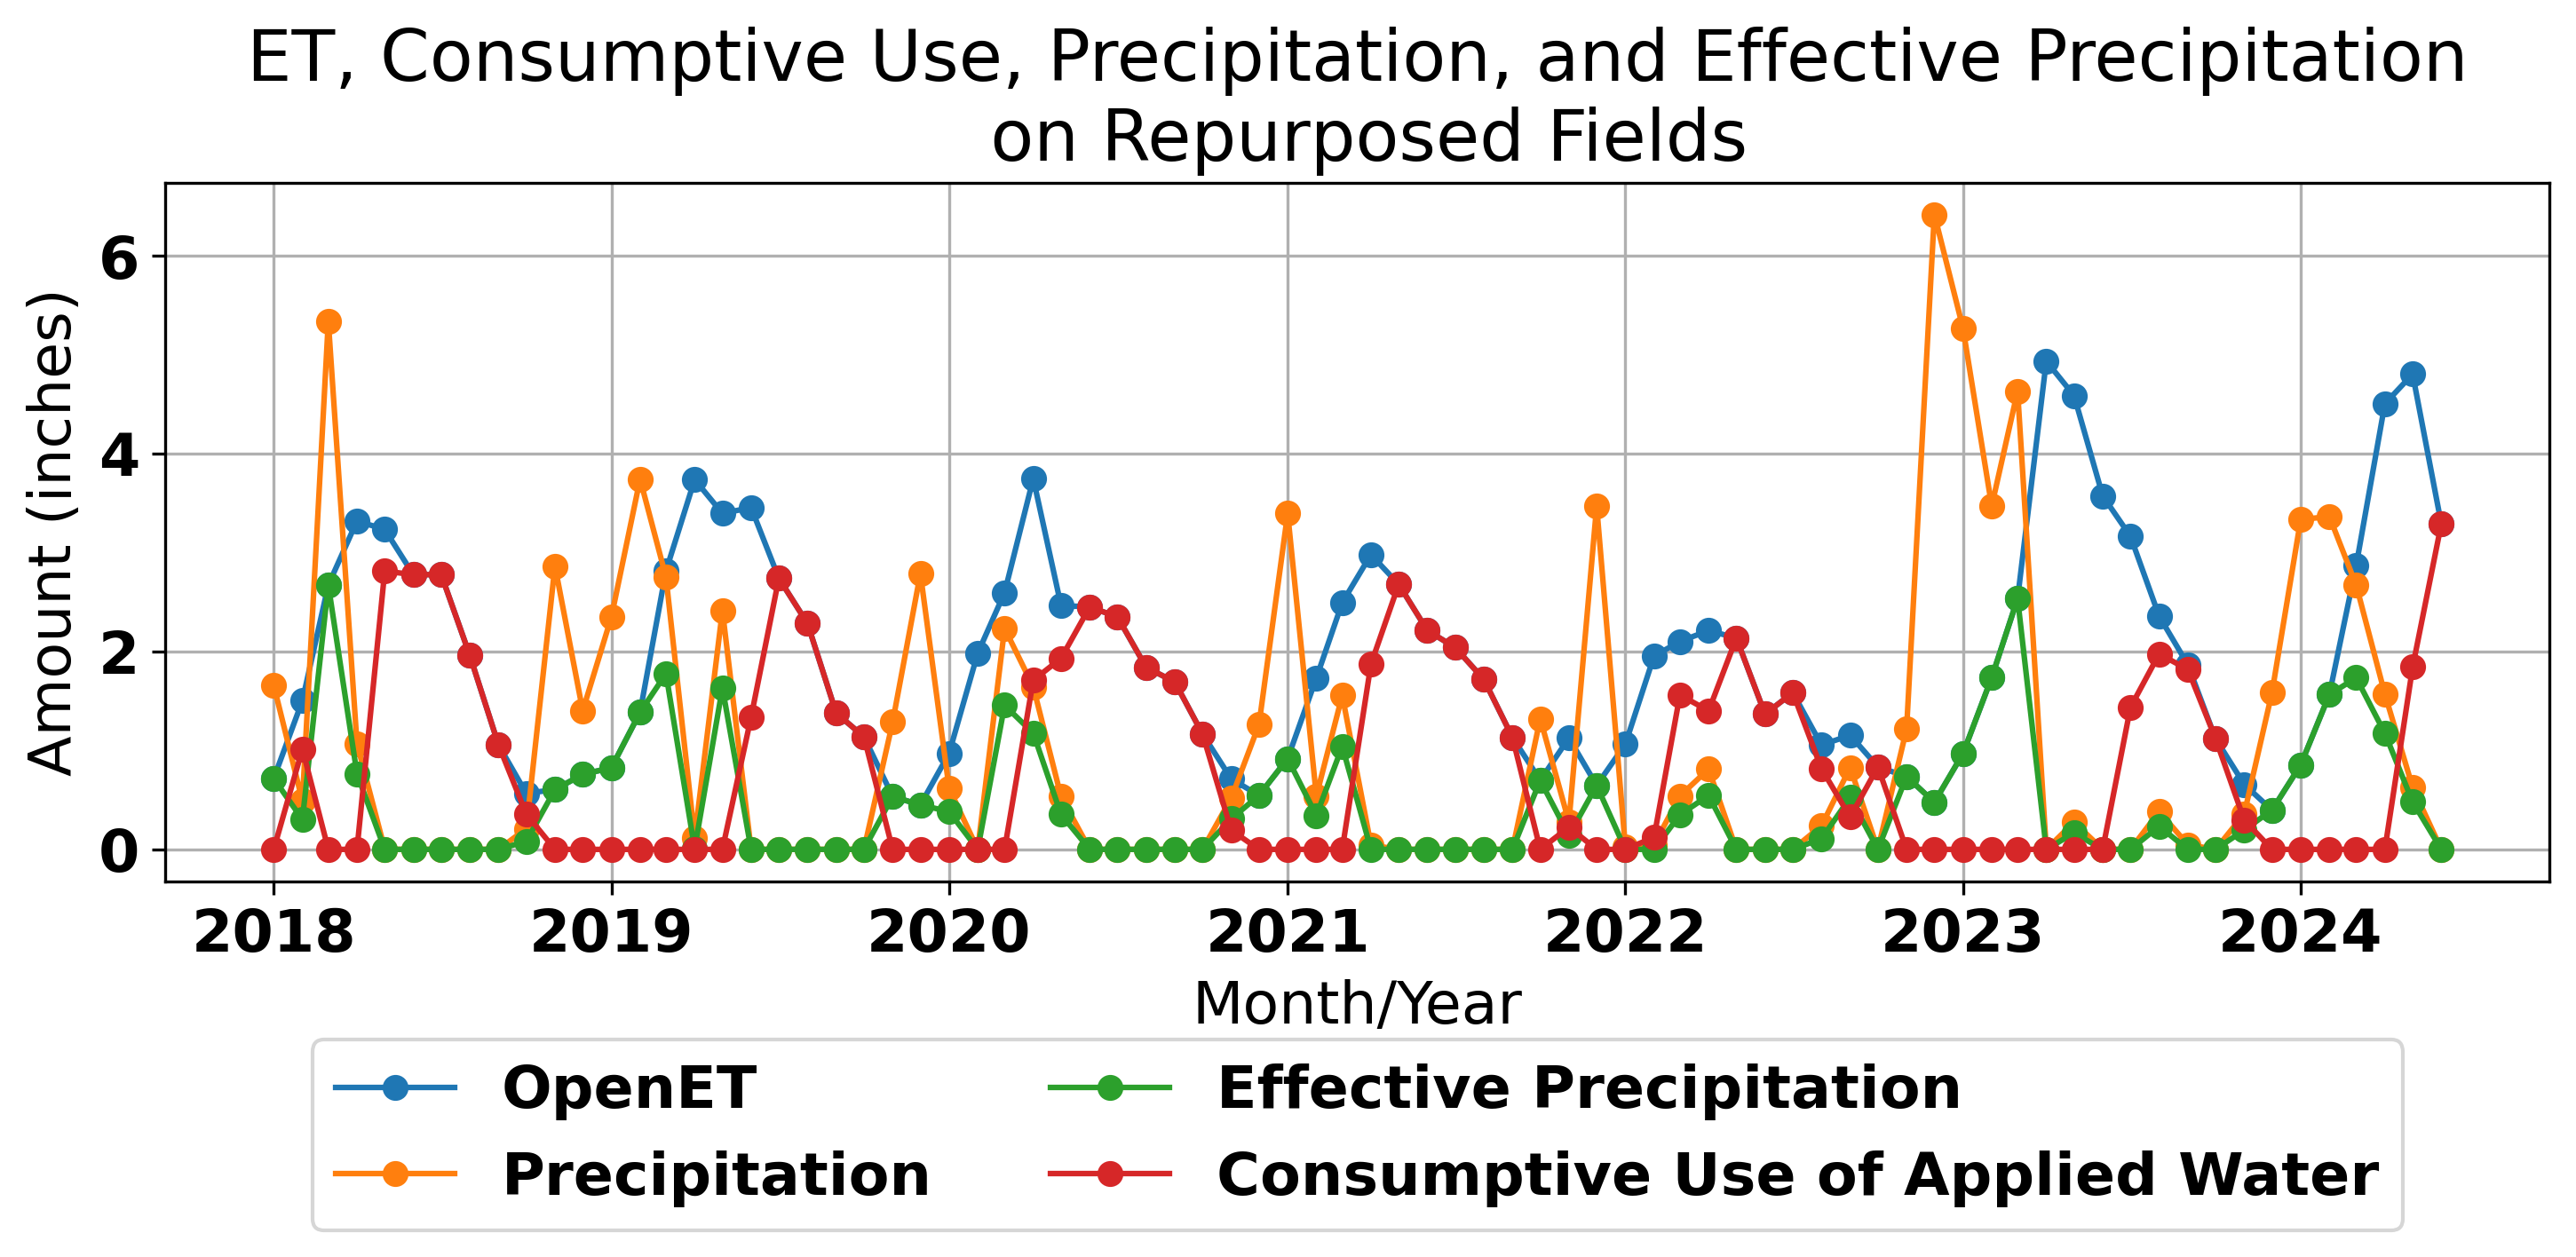

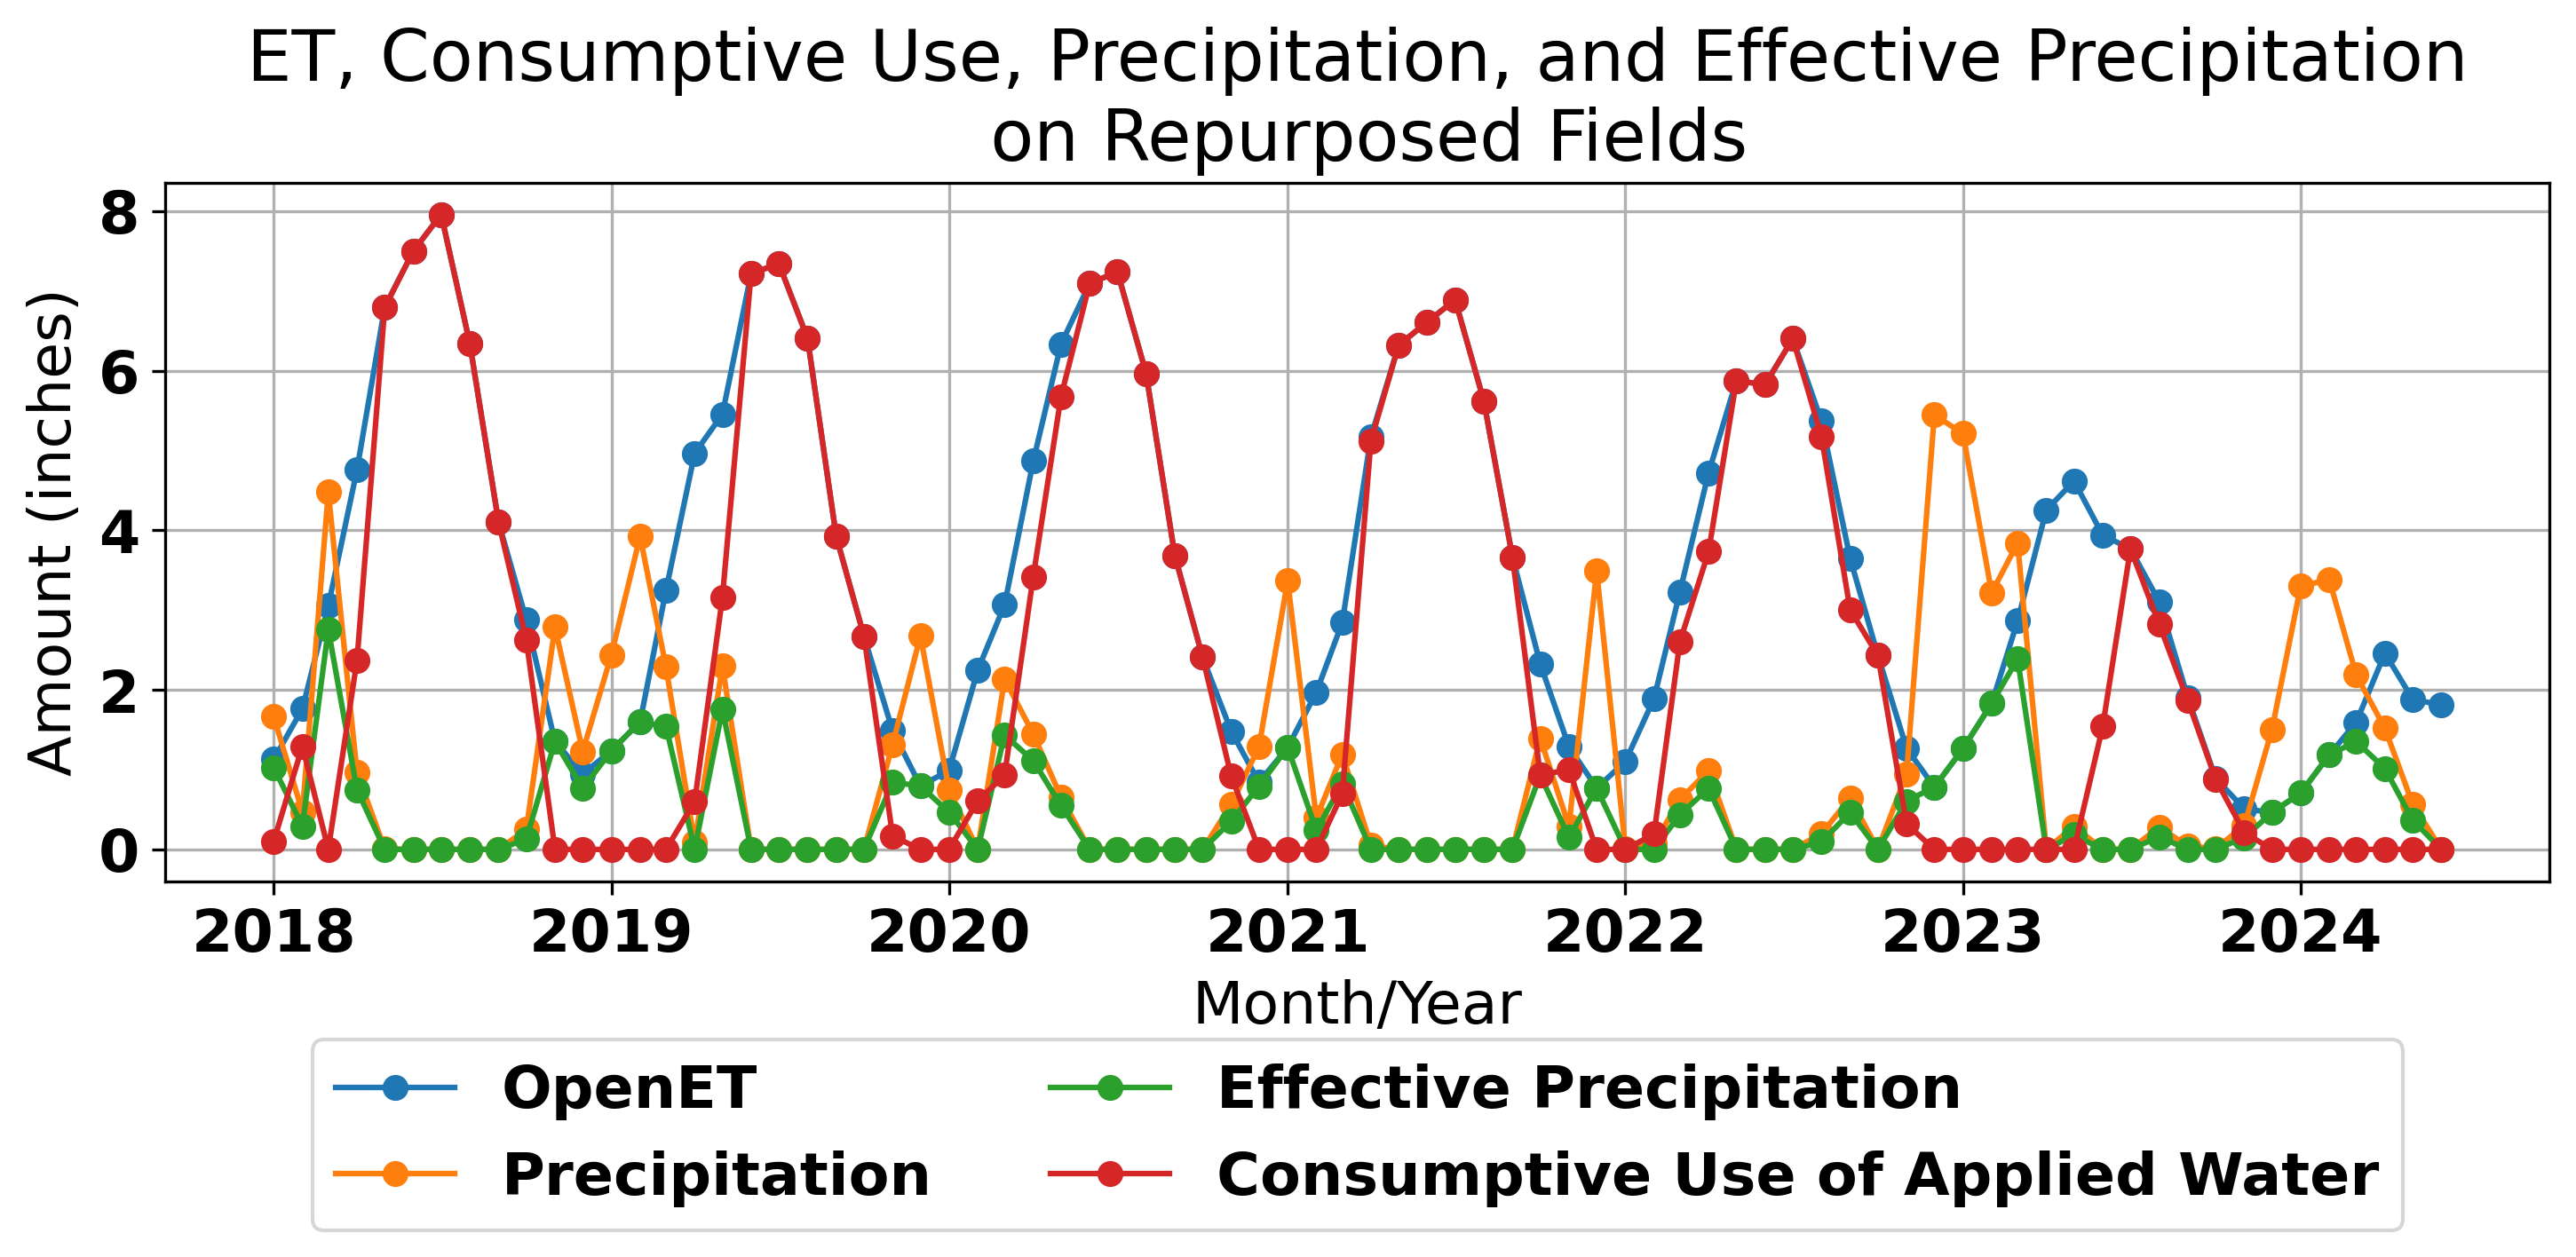

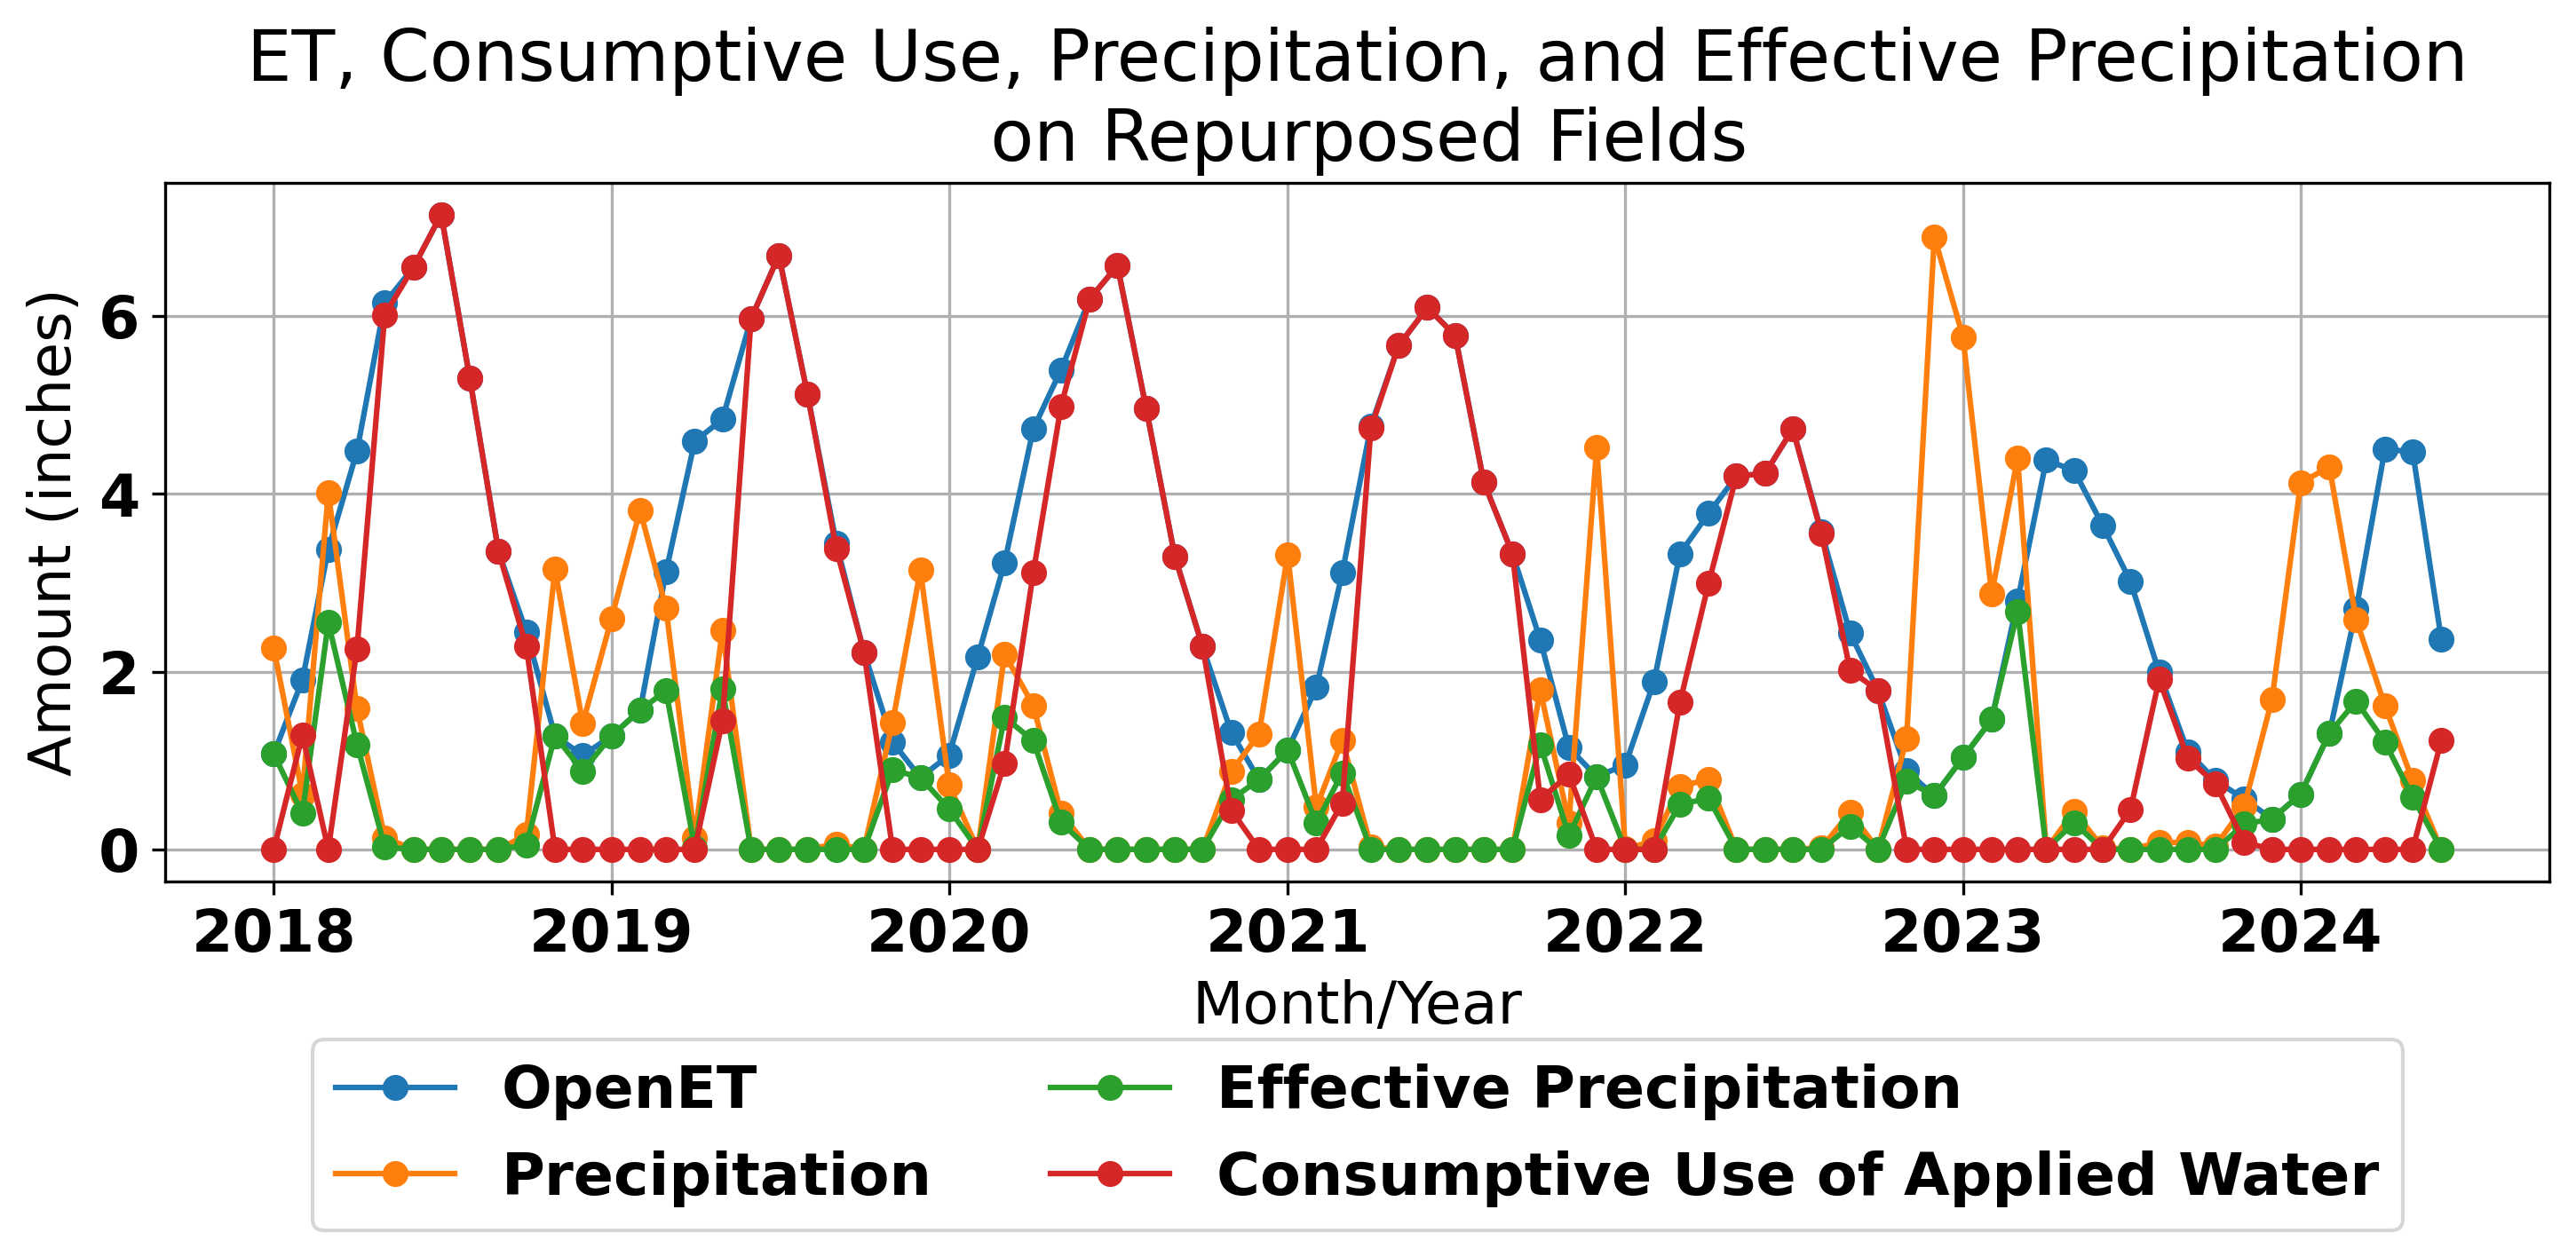

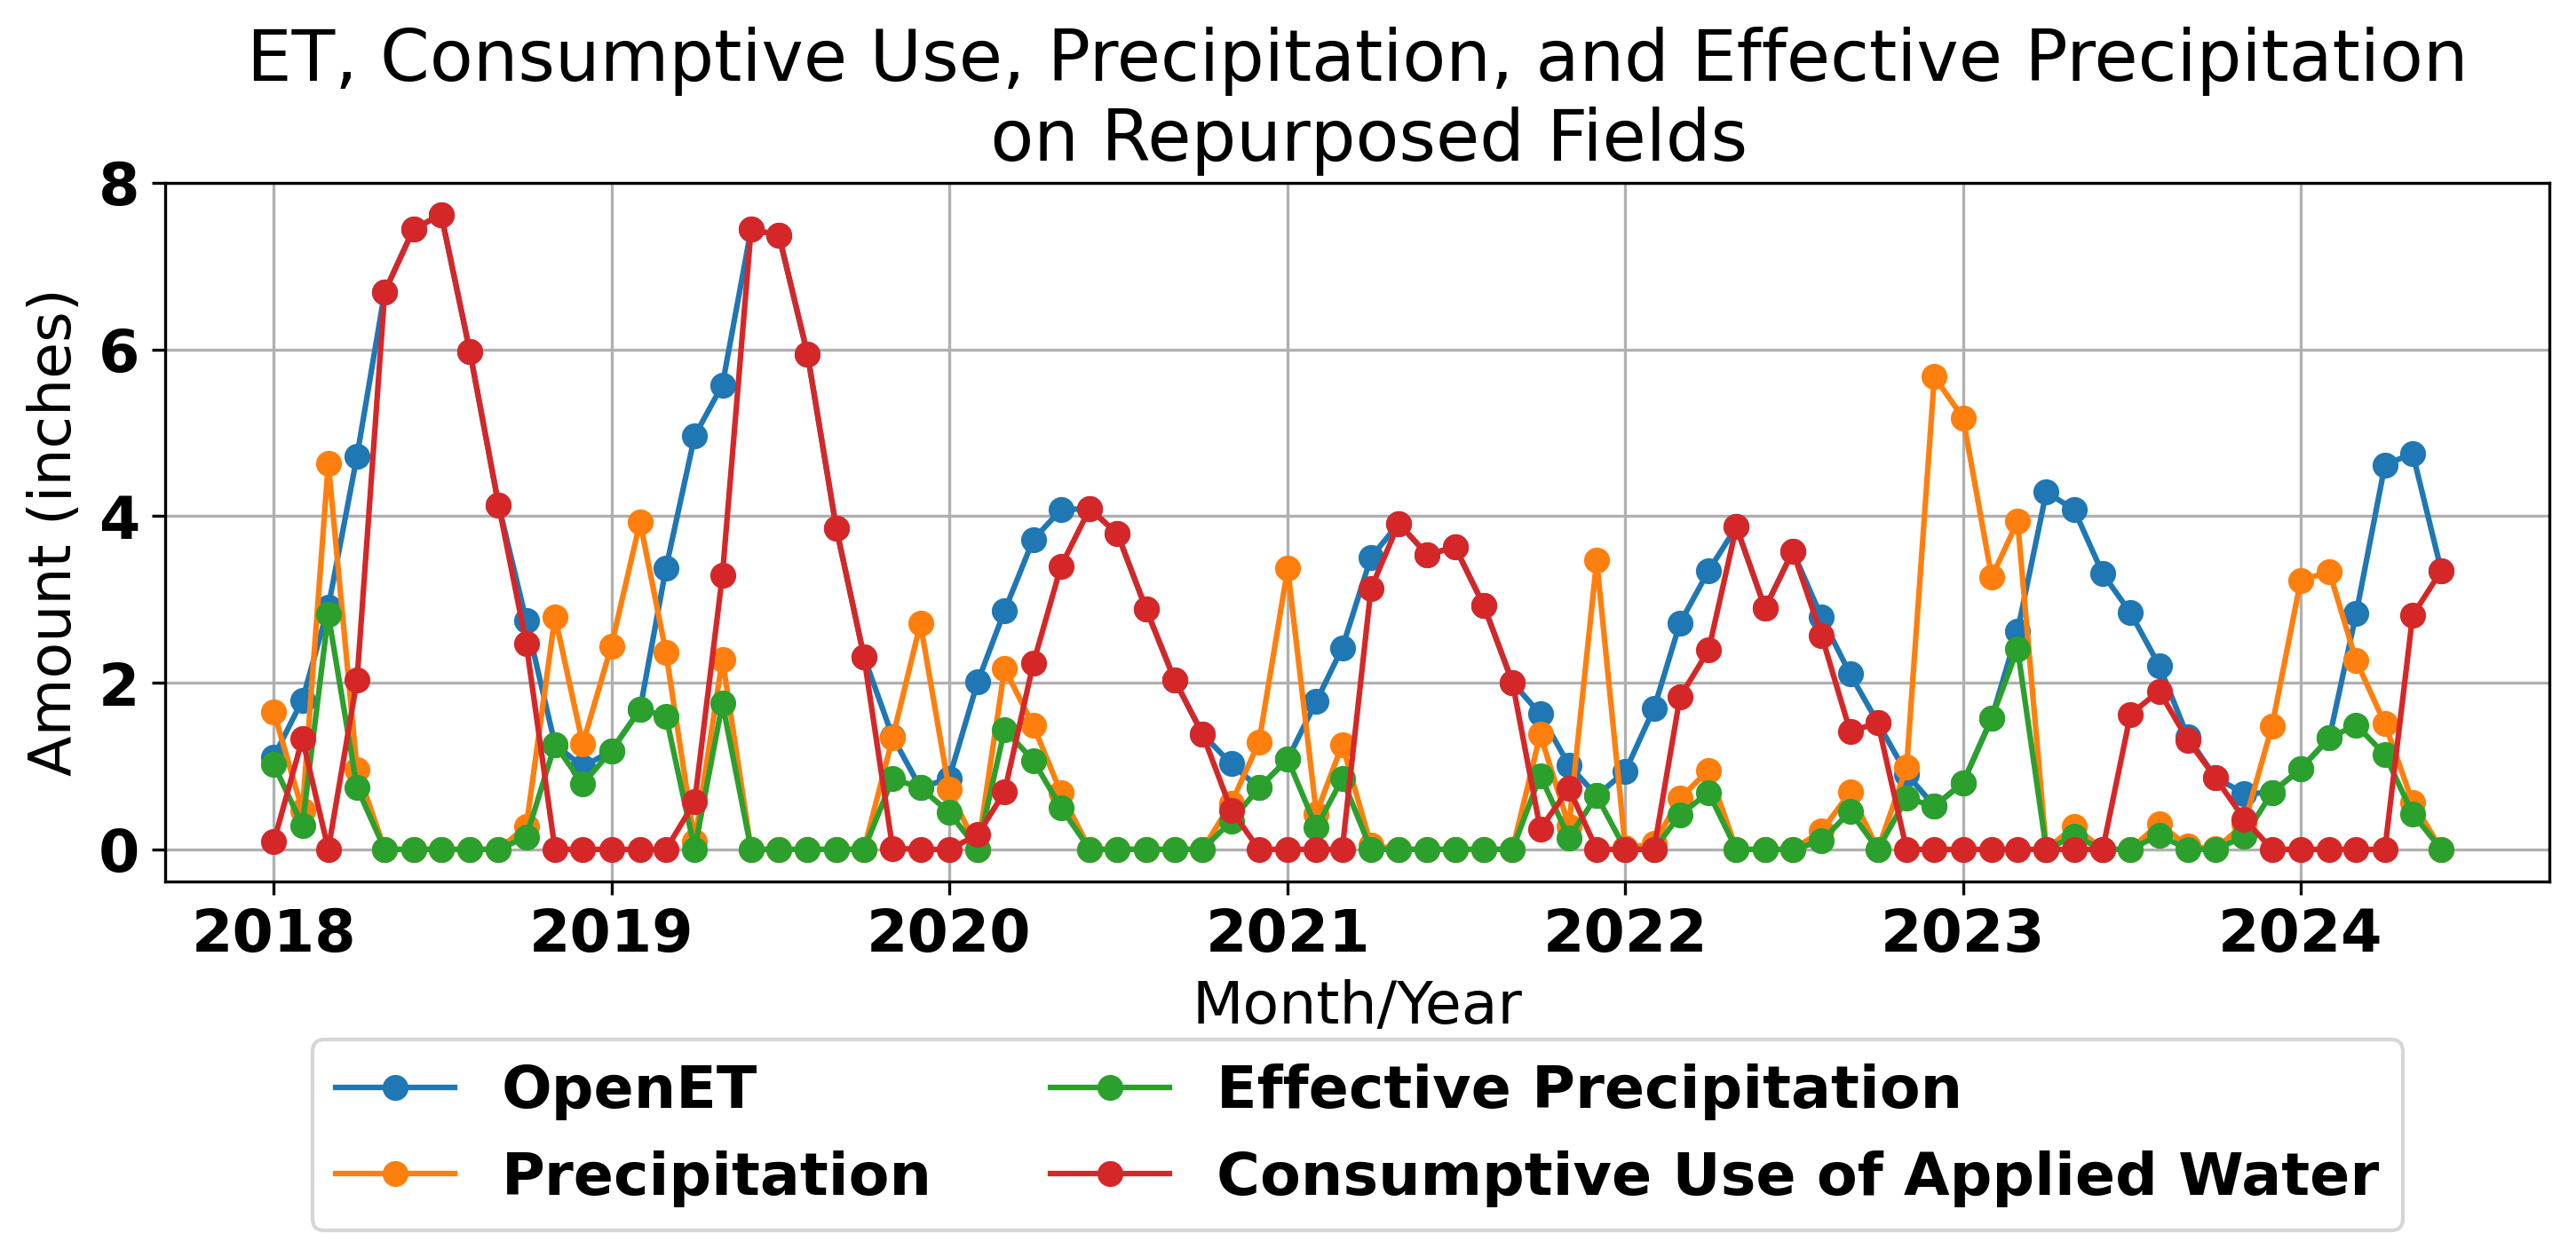

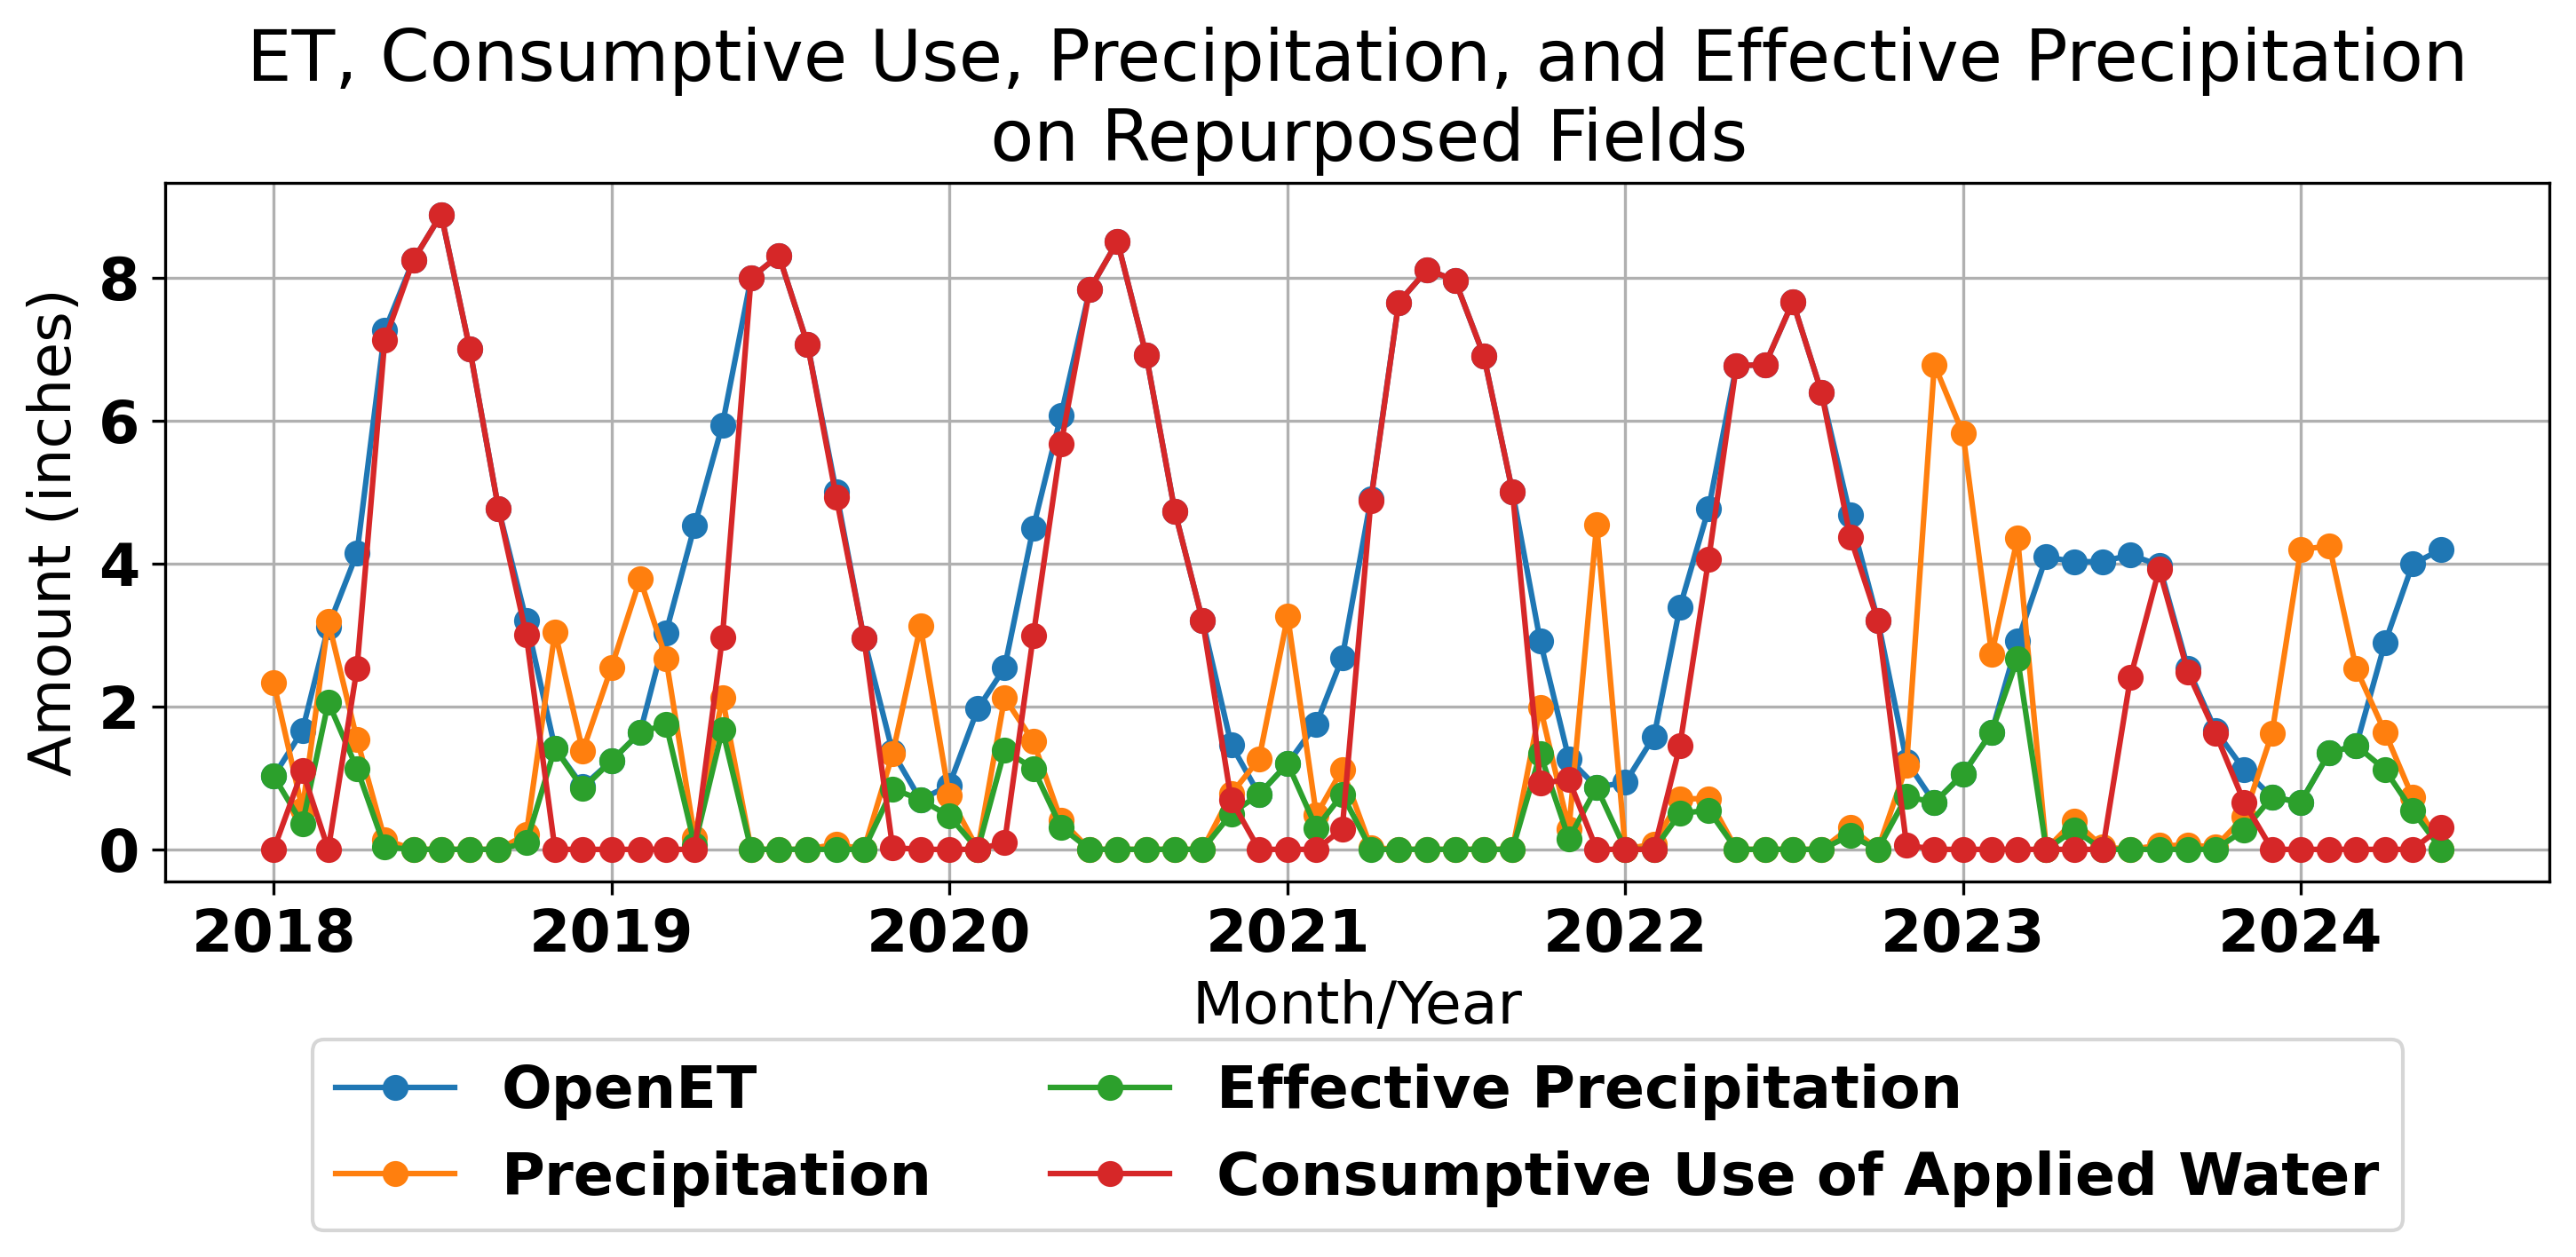

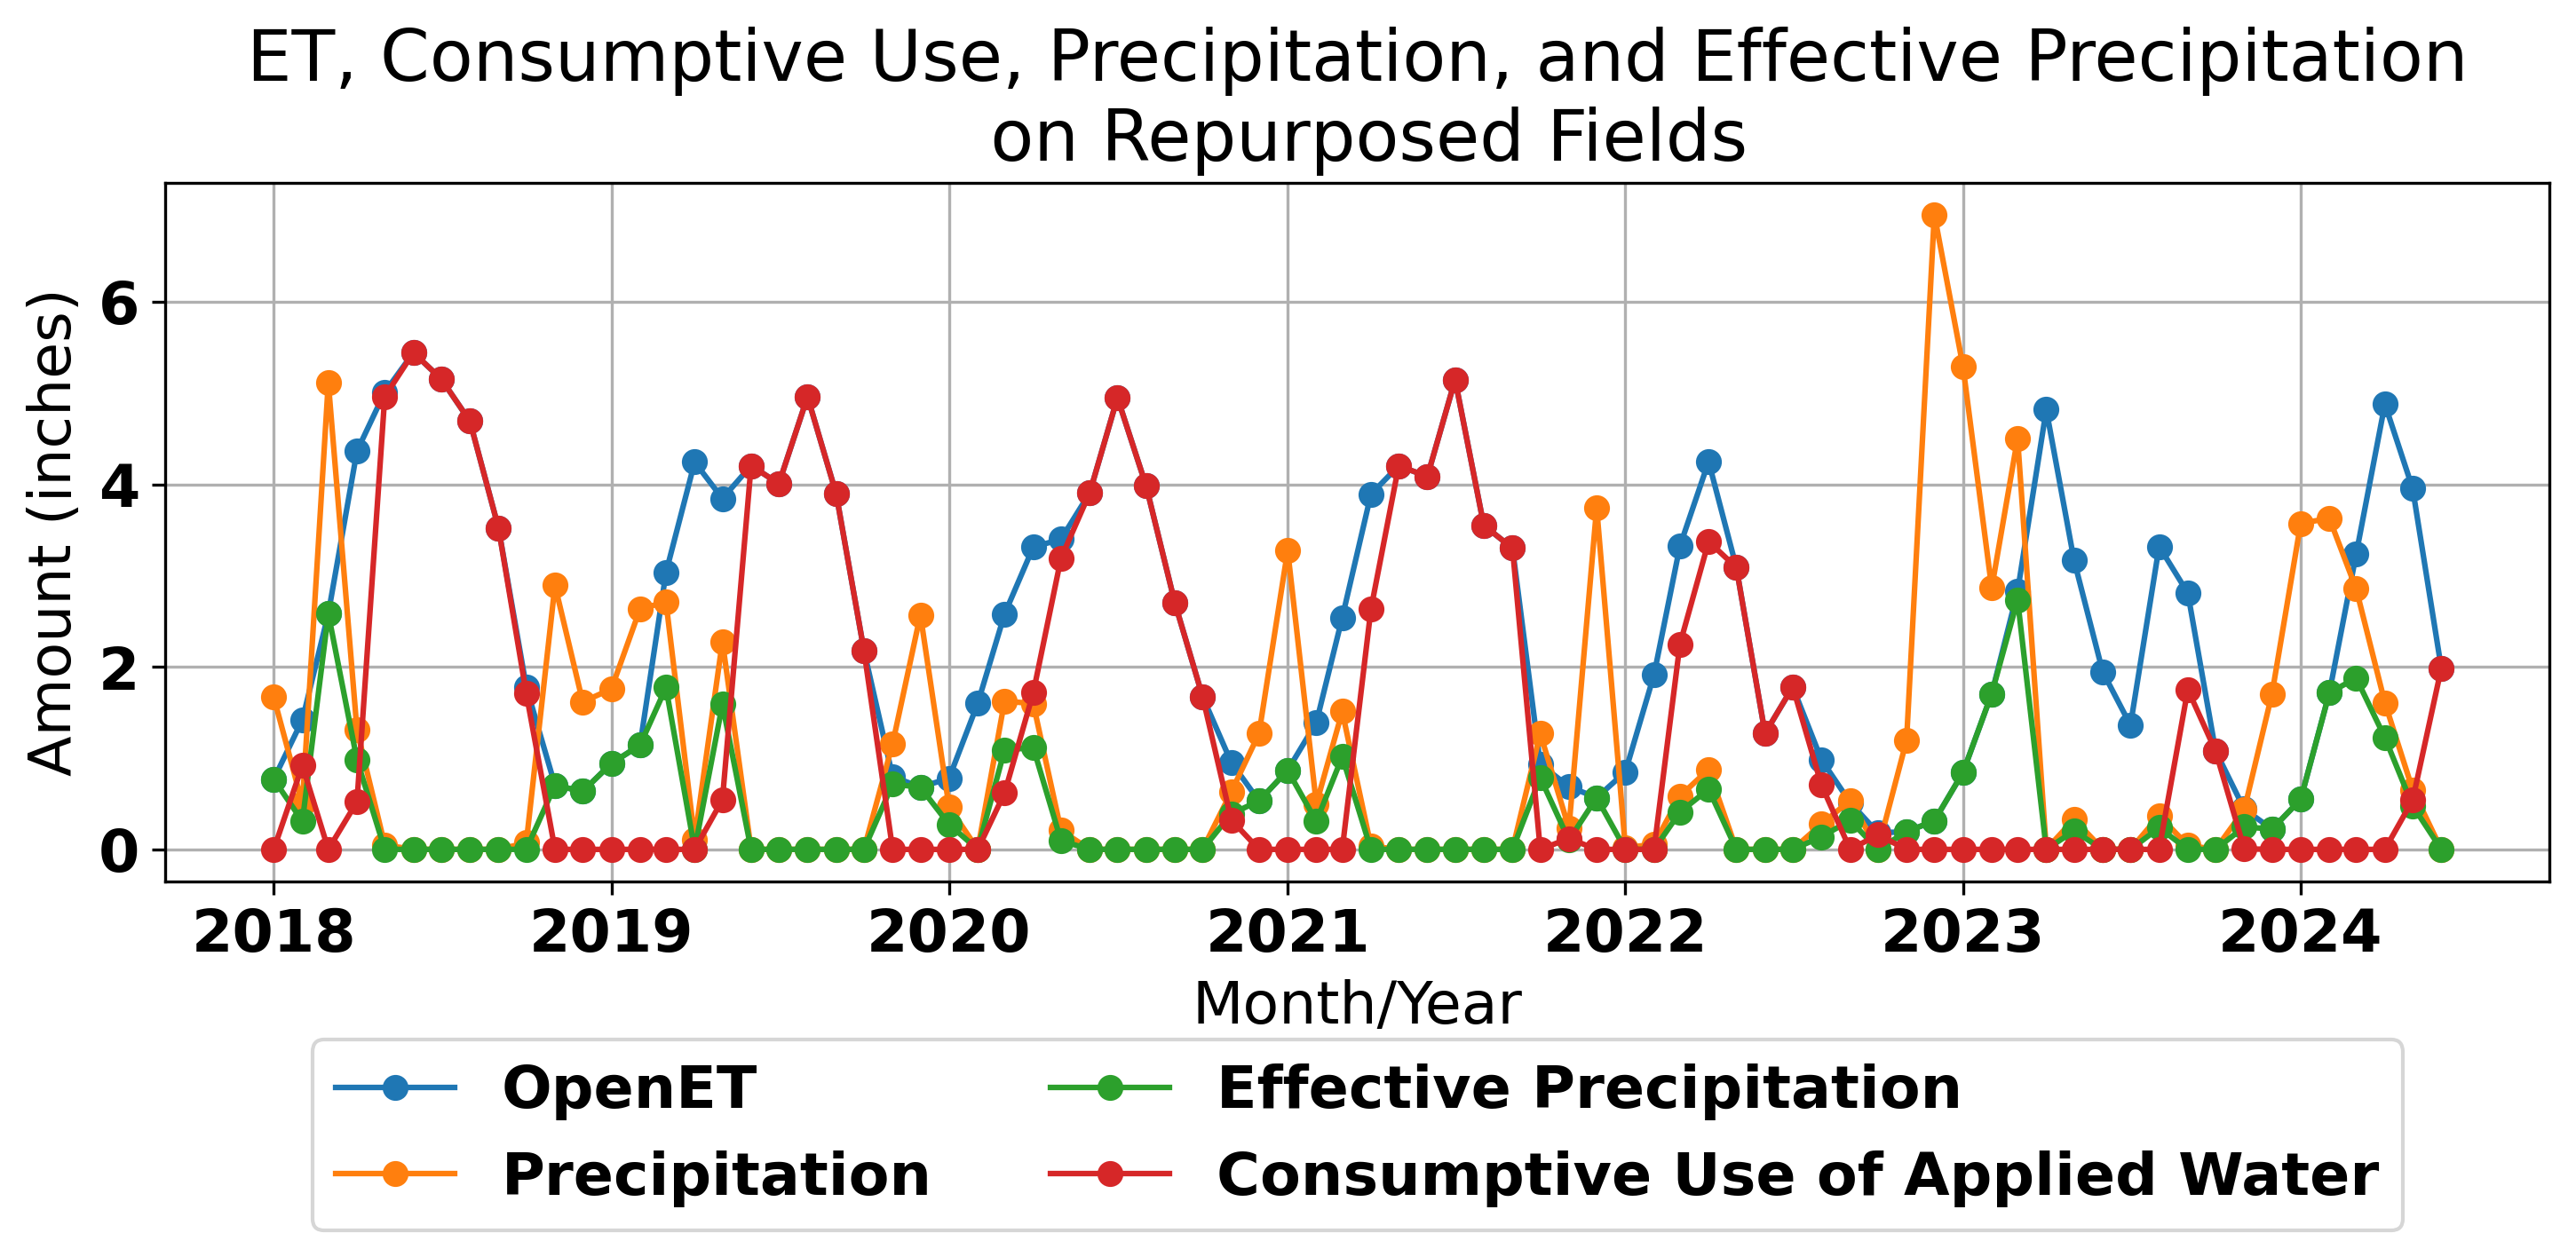

In [7]:


water_year = 2024
quarter = "Q3"
repurposed = "repurposed"

path_to_reports = fr"Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Reports\Quarterly\WY{water_year}_{quarter}\Report_PDFs"

os.makedirs(path_to_reports, exist_ok=True)

# Conduct data analysis and generate report from pdf 
for pdf_file in os.listdir(path_to_pdf_templates):
    
    Year = "Year1"    
        
    try:
        path_pdf_template = os.path.join(path_to_pdf_templates, pdf_file)
        report = query_openet.GenerateLrpReport.from_pdf_template(path_pdf_template)
        
        participant_name = report.lrp_participant_name
        agreement_number = report.lrp_agreement_number
        # Exception for a few contracts that are Year 2. The agreement number is larger than 10000 
        if int(agreement_number) > 10000:
            Year = "Year2"
        print("Processing report for {}, {}".format(participant_name, agreement_number))
        
        report_file_name = f"MSGSA_LRP_quarterly_report_WY{water_year}-{quarter}_{agreement_number}_{participant_name}.pdf"        
        fname = os.path.join(path_to_reports, report_file_name)
        
        pr_data = os.path.join(path_to_folder_with_data,f"{Year}_enrolled_{repurposed}_pr.csv")
        et_data = os.path.join(path_to_folder_with_data,f"{Year}_enrolled_{repurposed}_ET.csv")
        
        
        smb = report.generate_lrp_report(fn_pp=pr_data,
                                     fn_et=et_data,
                                     fn_fld_key=path_ekifld,
                                     water_year=water_year,
                                     quarter=quarter,
                                     fn_report_out=fname
                                     )
        # save the csv with calculations
        path_to_csv_report = os.path.abspath(os.path.join(path_to_reports, '..'))
        
        
        #os.makedirs(path_to_csv_report, exist_ok=True)
        smb.save_consumptive_use_to_csv(path_to_csv_report)
    
    except Exception as e:
        print(e)


In [7]:
# Conduct data analysis and generate report from pdf 

pdf_report = "Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Reports\Quarterly\WY2024_Q2\Report_PDFs\MSGSA_LRP_quarterly_report_WY2024-Q2_00007_Robson.pdf"

try:
    report = query_openet.GenerateLrpReport.from_pdf_template(pdf_report)
    smb = report.generate_lrp_report(fn_pp='./data/Year1_enrolled_repurposed_pr.csv',
                                 fn_et='./data/Year1_enrolled_repurposed_ET.csv',
                                 fn_fld_key='./data/EKIfld_IDs_key.csv',
                                 water_year=2024,
                                 quarter="Q2",
                                 fn_report_out="./reports/test_report_Robson.pdf"
                                 )
# save the 
    smb.save_consumptive_use_to_csv("reports")

except Exception as e:
    print(e)


Creating report with the following information
LRPAgreementNumber  00007
LRPParticipantName  Robson
AreaofLandRepurposed  101.33 acres
MinimumWaterUseReduction  233.73 AFY
BaselineWaterUse  309.57 AFY
MaximumConsumptiveUse  75.84 AFY
time data "2018-01-01" doesn't match format "%m/%d/%Y", at position 75. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


Creating report with the following information
LRPAgreementNumber  00010
LRPParticipantName  Fermin Campos
AreaofLandRepurposed  933.62 acres
MinimumWaterUseReduction  1877.58 AFY
BaselineWaterUse  1978.39 AFY
MaximumConsumptiveUse  100.81 AFY
calculating consumptive use for 2     57
3     58
4     59
5     60
6     61
7     62
8     63
9     64
10    65
11    66
12    67
13    68
14    69
15    70
16    71
17    72
Name: EKIfld, dtype: int64
[Errno 13] Permission denied: 'reports\\test_report_Campos.pdf'


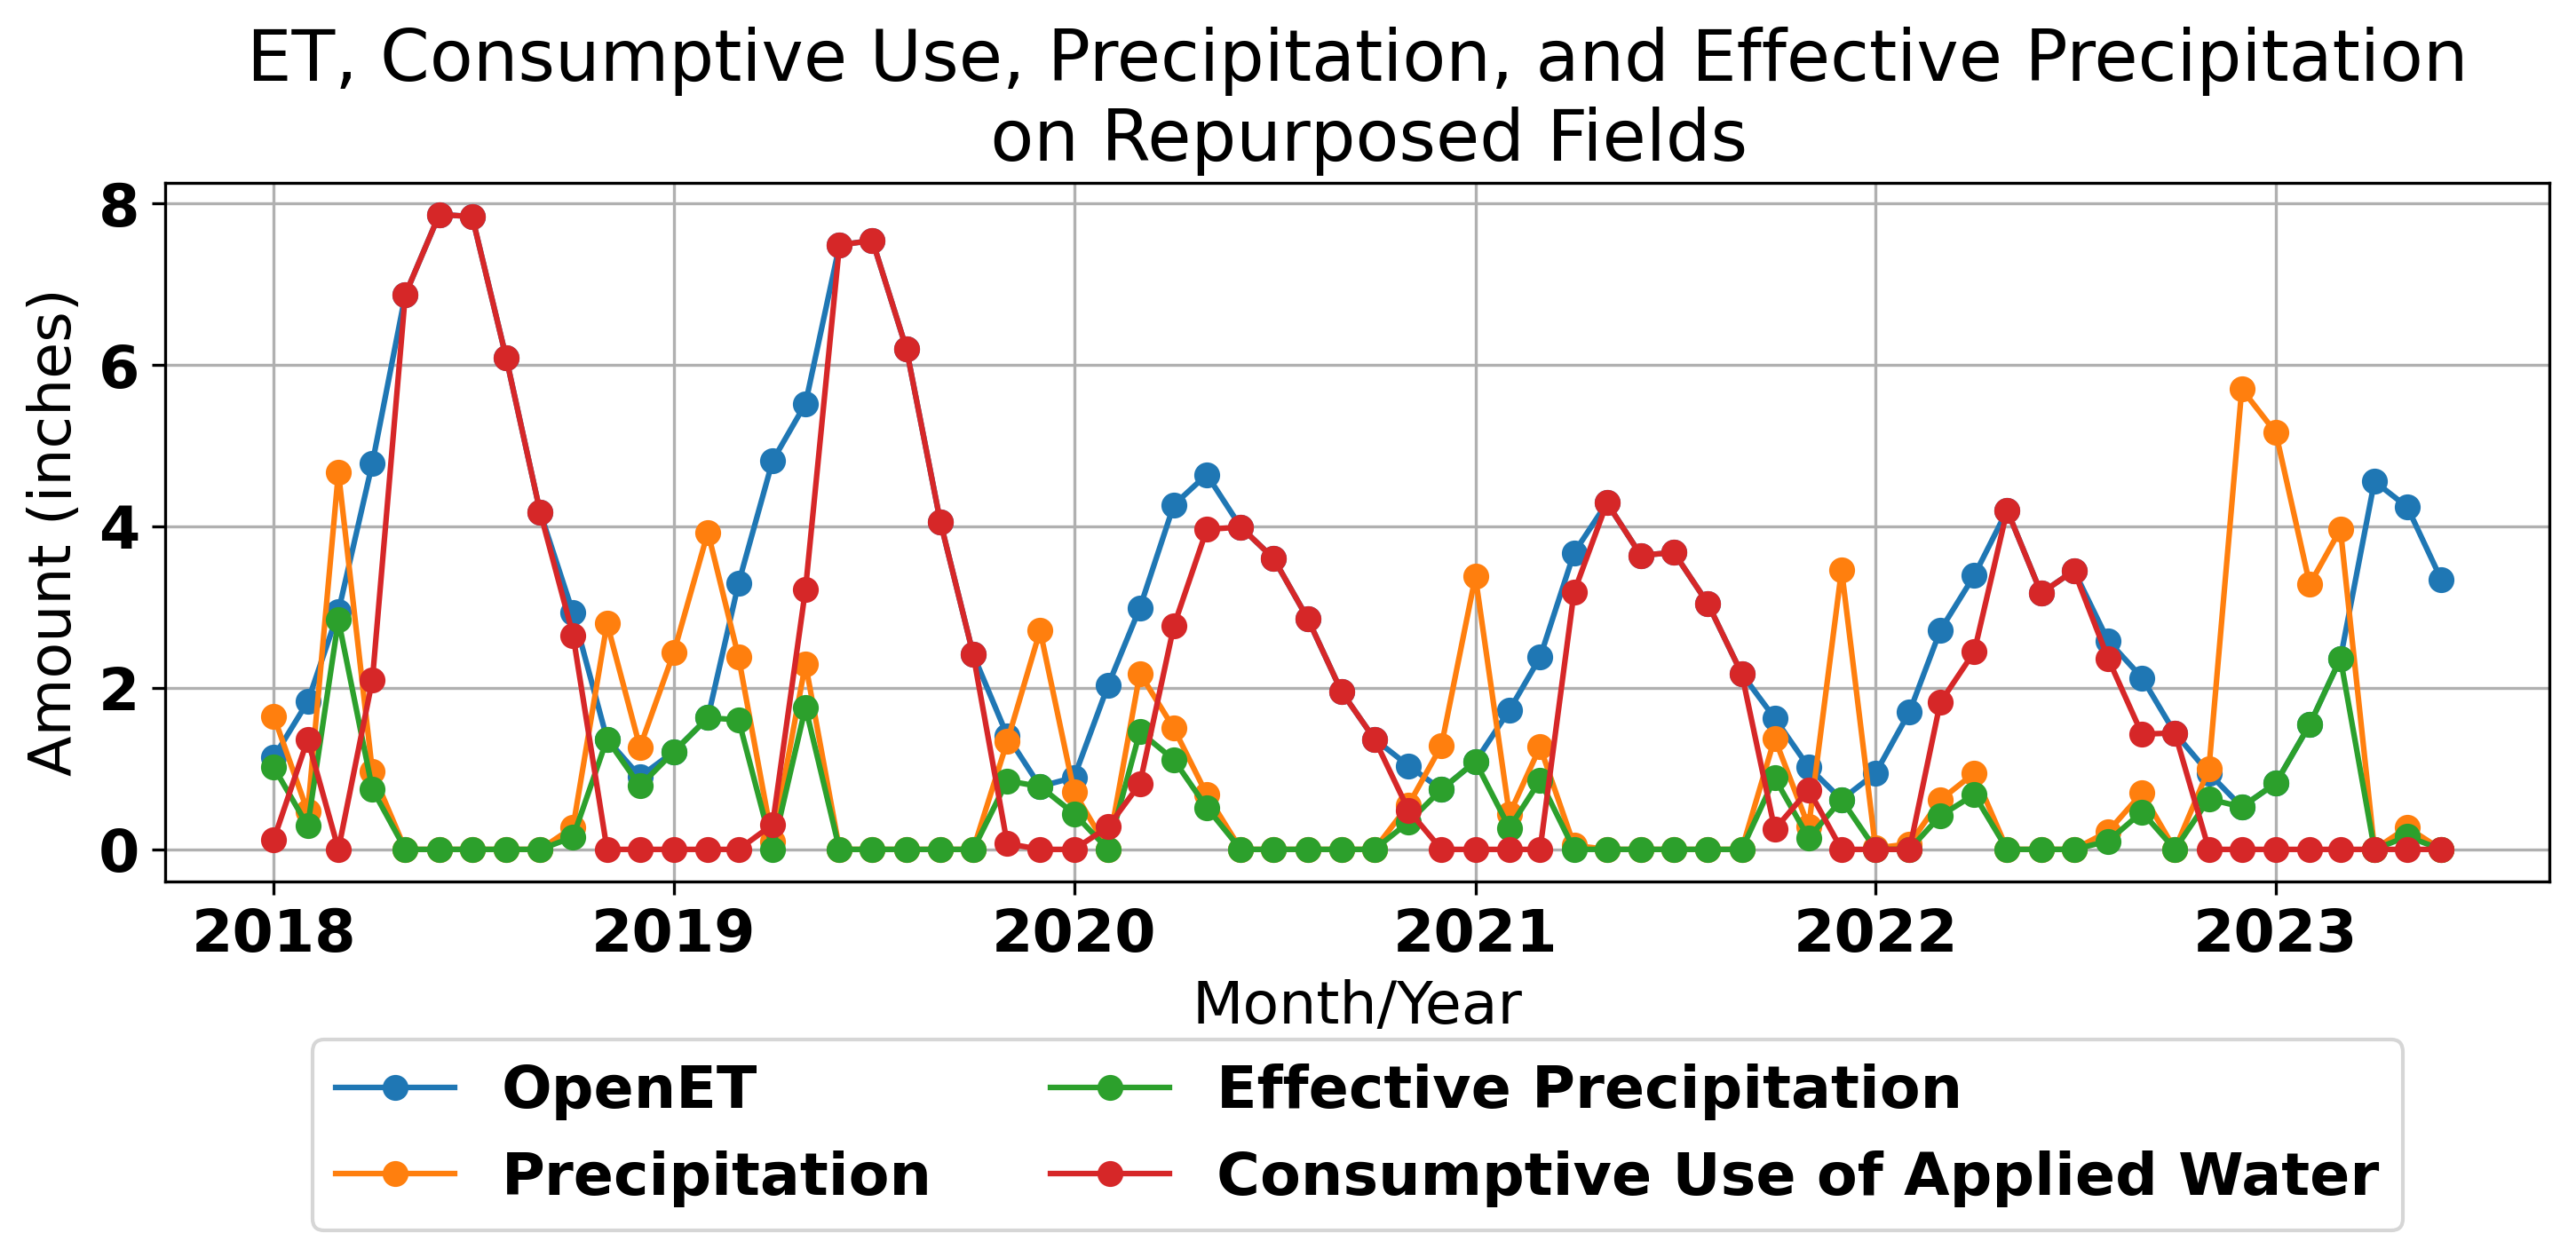

In [6]:
# Conduct data analysis and generate report from pdf 

pdf_report = "Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Reports\Quarterly\WY2023_Q3\WY2023_Q3_qtrly_report_00010_Campos_.pdf"

try:
    report = query_openet.GenerateLrpReport.from_pdf_template(pdf_report)
    smb = report.generate_lrp_report(fn_pp='./data/Year1_enrolled_repurposed_pr.csv',
                                 fn_et='./data/Year1_enrolled_repurposed_ET.csv',
                                 fn_fld_key='./data/EKIfld_IDs_key.csv',
                                 water_year=2023,
                                 quarter="Q3",
                                 fn_report_out="./reports/test_report_Campos.pdf"
                                 )
# save the 
    smb.save_consumptive_use_to_csv("reports")

except Exception as e:
    print(e)


Creating report with the following information
LRPAgreementNumber  00007
LRPParticipantName  Robson
AreaofLandRepurposed  101.33 acres
MinimumWaterUseReduction  233.73 AFY
BaselineWaterUse  309.57 AFY
MaximumConsumptiveUse  75.84 AFY
calculating consumptive use for 35    51
Name: EKIfld, dtype: int64


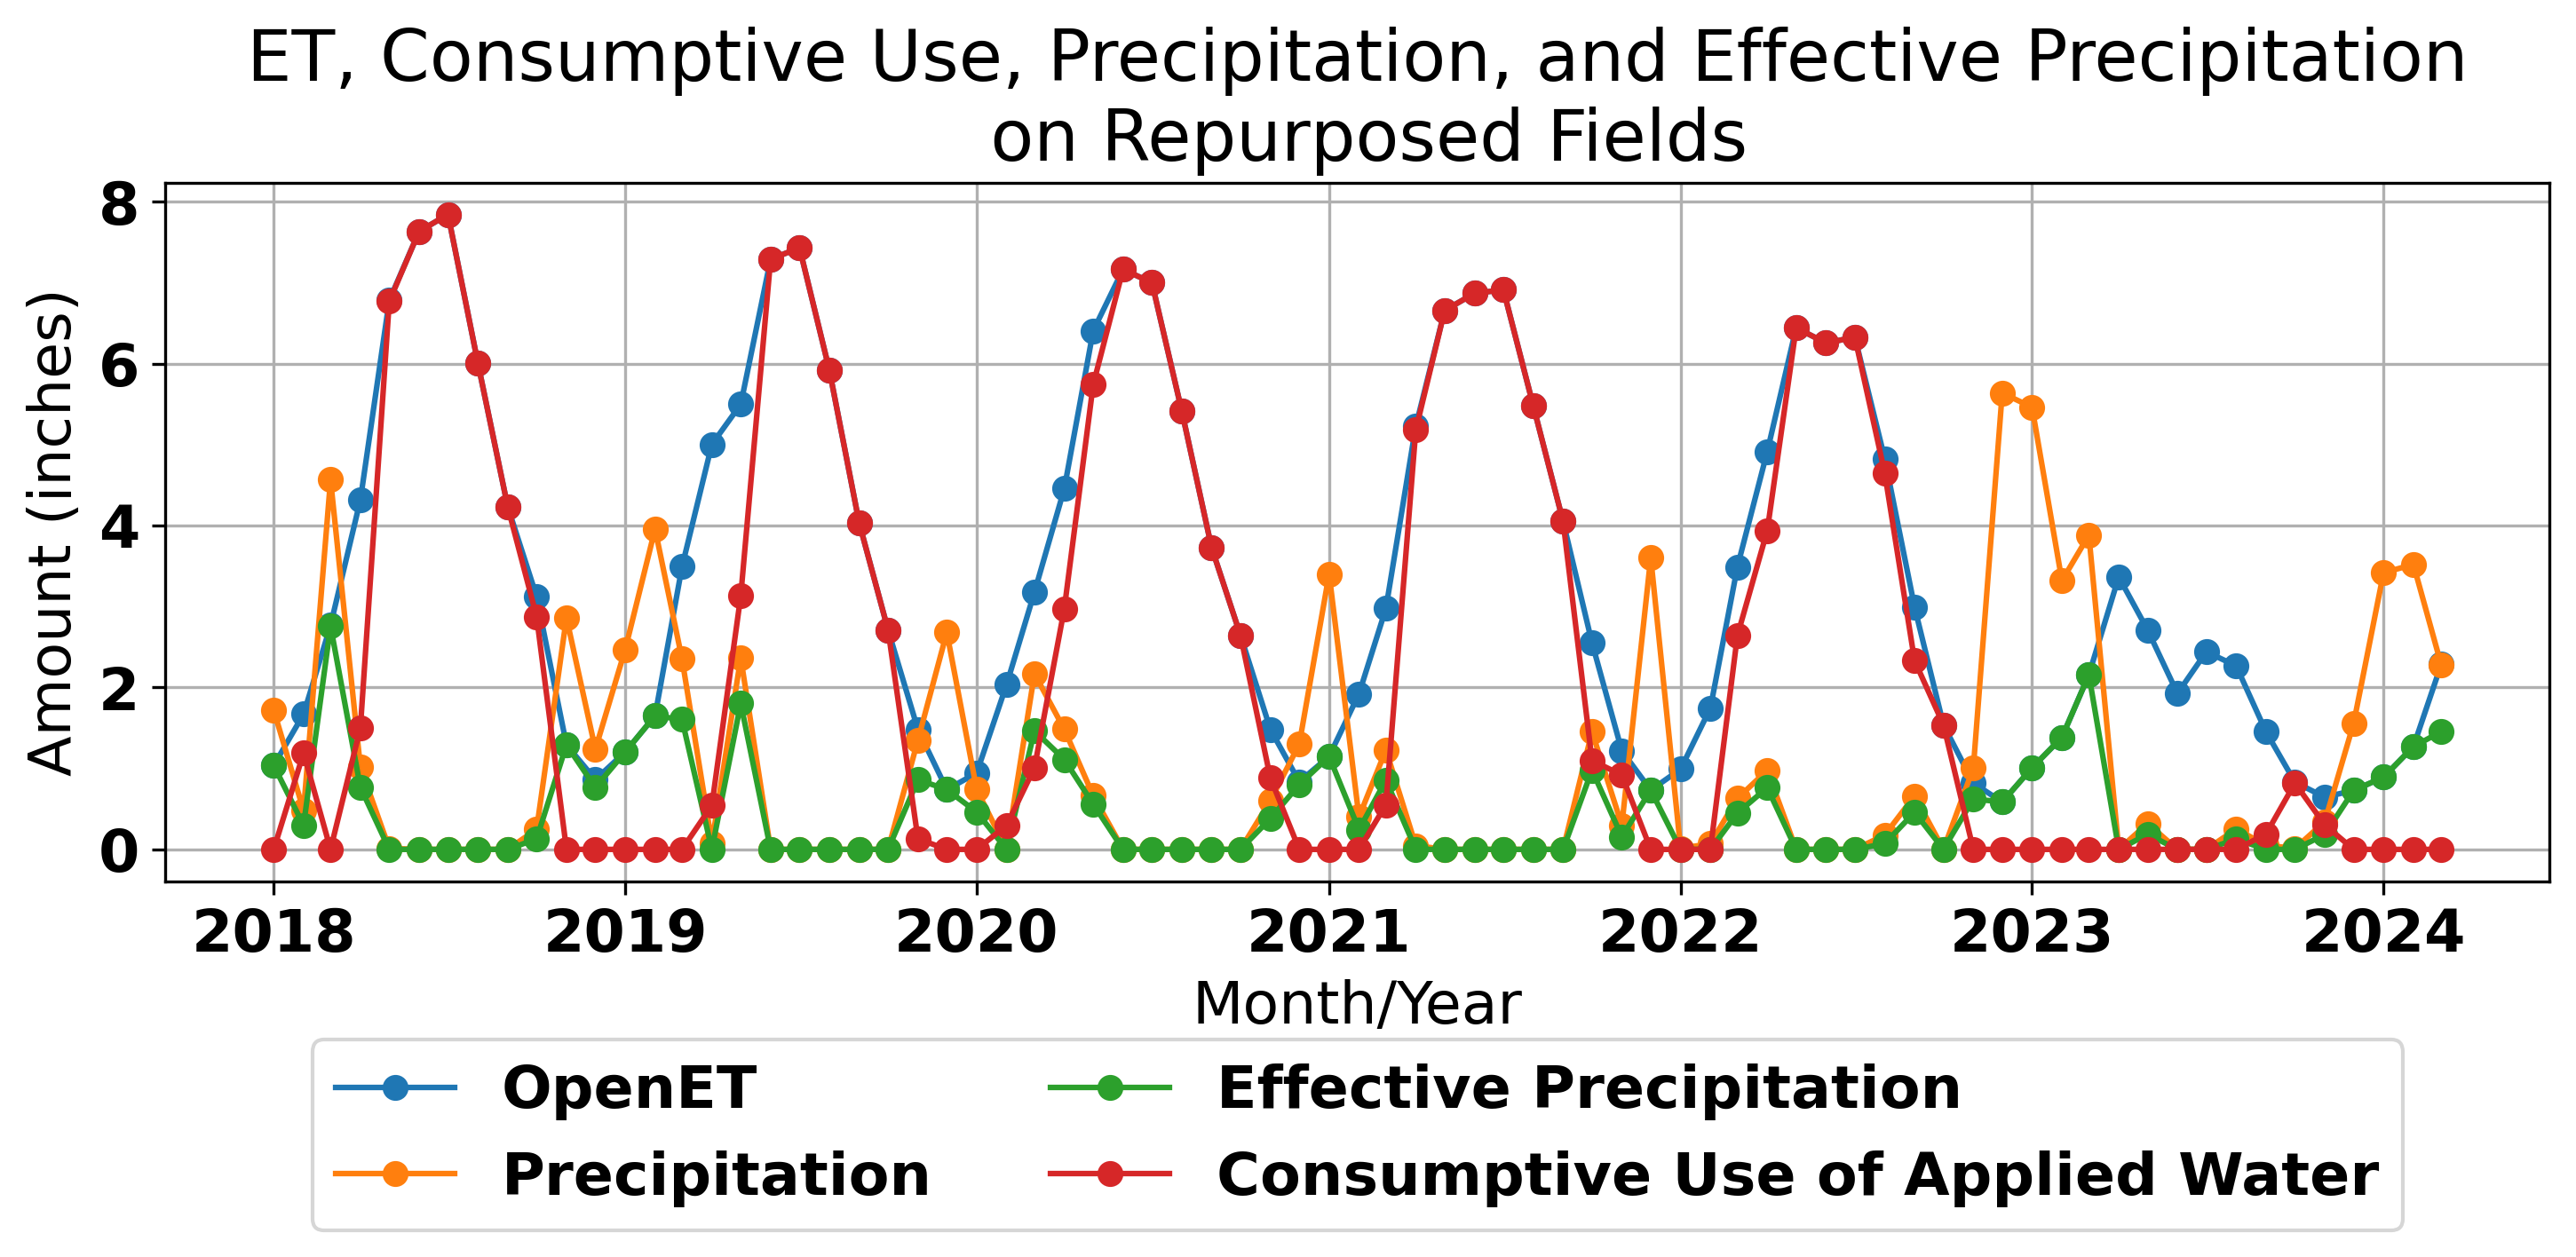

In [4]:
# Conduct data analysis and generate report from pdf 

pdf_report = "Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Reports\Quarterly\WY2024_Q2\Report_PDFs\MSGSA_LRP_quarterly_report_WY2024-Q2_00007_Robson.pdf"

try:
    report = query_openet.GenerateLrpReport.from_pdf_template(pdf_report)
    smb = report.generate_lrp_report(fn_pp=r'Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Reports\automated\Chris\Year1_enrolled_repurposed_pr.csv',
                                 fn_et=r'Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Reports\automated\Chris\Year1_enrolled_repurposed_ET.csv',
                                 fn_fld_key='./data/EKIfld_IDs_key.csv',
                                 water_year=2024,
                                 quarter="Q2",
                                 fn_report_out="./reports/test_report_Robson.pdf"
                                 )
# save the 
    smb.save_consumptive_use_to_csv("reports")

except Exception as e:
    print(e)
